In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import seaborn as sns
import os
import contextily as ctx  

# Fetching Data

In [84]:
#merging all crime dataset

# Path to my folder of datasets
folder_path = "/Users/deen/Desktop/crime analysis/merging"

# Get list of all CSV files
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and concatenate all into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
data=pd.DataFrame(df)

# Preview the combined dataset
data.head()

Crime ID    Month  \
0                                                NaN  2024-09   
1  7a8b7c7f0b8e6f113788e25ec5edf45268fd614ae70307...  2024-09   
2  620cd472328f788c78bb36d59e58a65fe3df5631692be7...  2024-09   
3  242dabdcb663b6fc50b7a7cdb5a32c12c6b409fe7d8f1e...  2024-09   
4  482aa09a8759507ae8fc3ce5e2ae954bec63e0b7695f42...  2024-09   

            Reported by          Falls within  Longitude   Latitude  \
0  West Midlands Police  West Midlands Police  -1.850772  52.588709   
1  West Midlands Police  West Midlands Police  -1.849177  52.593202   
2  West Midlands Police  West Midlands Police  -1.849790  52.590937   
3  West Midlands Police  West Midlands Police  -1.847123  52.593864   
4  West Midlands Police  West Midlands Police  -1.849790  52.590937   

                       Location  LSOA code        LSOA name  \
0    On or near Seymour Gardens  E01009417  Birmingham 001A   
1  On or near Russell Bank Road  E01009417  Birmingham 001A   
2       On or near Walsall Road  E01009417  Birmingham 001A   
3        On or near Bramble Way  E01009417  Birmingham 001A   
4       On or near Walsall Road  E01009417  Birmingham 001A   

                     Crime type  \
0         Anti-social behaviour   
1                 Vehicle crime   
2                 Vehicle crime   
3  Violence and sexual offences   
4  Violence and sexual offences   

                           Last outcome category  Context  
0                                            NaN      NaN  
1                    Unable to prosecute suspect      NaN  
2  Investigation complete; no suspect identified      NaN  
3     Action to be taken by another organisation      NaN  
4  Investigation complete; no suspect identified      NaN

In [85]:
#loading social economy data(ONS)
imd_df=pd.read_csv('/Users/deen/Desktop/crime analysis/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv')
imd_df.rename(columns={'LSOA code (2011)': 'LSOA code','LSOA name (2011)': 'LSOA name'}, inplace=True)
column_to_use=imd_df[['LSOA code','LSOA name','Index of Multiple Deprivation (IMD) Score','Employment Score (rate)','Income Score (rate)']]
coventry_name=imd_df['LSOA name'].str.startswith('Coventry',na=False)
social_df=column_to_use[coventry_name]
social_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 9242 to 32208
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LSOA code                                  195 non-null    object 
 1   LSOA name                                  195 non-null    object 
 2   Index of Multiple Deprivation (IMD) Score  195 non-null    float64
 3   Employment Score (rate)                    195 non-null    float64
 4   Income Score (rate)                        195 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.1+ KB


# Data Cleaning 

In [86]:
#drop Nan column for crime data
dropped_column=data.drop(columns=['Context']) 

#selecting specific column 
columns_to_use=data[['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'Crime type', 'LSOA name','LSOA code', 'Last outcome category']]

is_coventary=columns_to_use['LSOA name'].str.startswith('Coventry',na=False)
Analysis_data=columns_to_use[is_coventary]

# Sorting the columns by month
Analysis_data=Analysis_data.sort_values(by='Month')

#previewing sorted data
print(Analysis_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 288855 entries, 2339732 to 752685
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               256834 non-null  object 
 1   Month                  288855 non-null  object 
 2   Longitude              288855 non-null  float64
 3   Latitude               288855 non-null  float64
 4   Location               288855 non-null  object 
 5   Crime type             288855 non-null  object 
 6   LSOA name              288855 non-null  object 
 7   LSOA code              288855 non-null  object 
 8   Last outcome category  256834 non-null  object 
dtypes: float64(2), object(7)
memory usage: 22.0+ MB
None


In [87]:
Analysis_data.head()

Crime ID    Month  \
2339732  7f68dd664aa52c902ffc440cf67eb62b7632260c88a851...  2018-01   
2338010  12c2855c6f37ead368aecbdd9a6adee5cf14bae0a624b8...  2018-01   
2338009                                                NaN  2018-01   
2338008                                                NaN  2018-01   
2338007                                                NaN  2018-01   

         Longitude   Latitude                         Location  \
2339732  -1.513219  52.450724  On or near Houldsworth Crescent   
2338010  -1.527878  52.411820         On or near Shopping Area   
2338009  -1.527878  52.411820         On or near Shopping Area   
2338008  -1.527878  52.411820         On or near Shopping Area   
2338007  -1.531987  52.412529           On or near Supermarket   

                           Crime type      LSOA name  LSOA code  \
2339732  Violence and sexual offences  Coventry 043E  E01032587   
2338010     Criminal damage and arson  Coventry 017C  E01009647   
2338009         Anti-social behaviour  Coventry 017C  E01009647   
2338008         Anti-social behaviour  Coventry 017C  E01009647   
2338007         Anti-social behaviour  Coventry 017C  E01009647   

                                 Last outcome category  
2339732                    Unable to prosecute suspect  
2338010  Investigation complete; no suspect identified  
2338009                                            NaN  
2338008                                            NaN  
2338007                                            NaN

In [88]:
# Handling NaN values

print(Analysis_data.isna().sum()) #check the sum of null values

# Checking if any rows have no missing values
print("Rows with no missing values:", len(Analysis_data.dropna()))

#Removing nan values
Analysis_data=Analysis_data.dropna()
Analysis_data.info()



Crime ID                 32021
Month                        0
Longitude                    0
Latitude                     0
Location                     0
Crime type                   0
LSOA name                    0
LSOA code                    0
Last outcome category    32021
dtype: int64
Rows with no missing values: 256834
<class 'pandas.core.frame.DataFrame'>
Index: 256834 entries, 2339732 to 752685
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               256834 non-null  object 
 1   Month                  256834 non-null  object 
 2   Longitude              256834 non-null  float64
 3   Latitude               256834 non-null  float64
 4   Location               256834 non-null  object 
 5   Crime type             256834 non-null  object 
 6   LSOA name              256834 non-null  object 
 7   LSOA code              256834 non-null  object 
 8   Last outcome category  256

# Preprocessing (Handling Datatypes)

In [89]:
Analysis_data['Month'] = pd.to_datetime(Analysis_data['Month'],format='%Y-%m')
Analysis_data.set_index('Month', inplace=True)


# Creating additional time-based features
Analysis_data['Year'] = Analysis_data.index.year
Analysis_data['MonthNum'] = Analysis_data.index.month
Analysis_data['MonthName'] = Analysis_data.index.strftime('%B')
Analysis_data.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256834 entries, 2018-01-01 to 2025-05-01
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               256834 non-null  object 
 1   Longitude              256834 non-null  float64
 2   Latitude               256834 non-null  float64
 3   Location               256834 non-null  object 
 4   Crime type             256834 non-null  object 
 5   LSOA name              256834 non-null  object 
 6   LSOA code              256834 non-null  object 
 7   Last outcome category  256834 non-null  object 
 8   Year                   256834 non-null  int32  
 9   MonthNum               256834 non-null  int32  
 10  MonthName              256834 non-null  object 
dtypes: float64(2), int32(2), object(7)
memory usage: 21.6+ MB


In [90]:
Analysis_data

Crime ID  Longitude  \
Month                                                                      
2018-01-01  7f68dd664aa52c902ffc440cf67eb62b7632260c88a851...  -1.513219   
2018-01-01  12c2855c6f37ead368aecbdd9a6adee5cf14bae0a624b8...  -1.527878   
2018-01-01  c9350bfe880c60df12c33bdec9d102ca616933f9276ad7...  -1.525230   
2018-01-01  7bd6e02dac714cce27ffb3a950d30005b51b0426c831da...  -1.537948   
2018-01-01  7889b41cf8d0a24a957212e7d1e70e62284f3203441f33...  -1.543697   
...                                                       ...        ...   
2025-05-01  288417ba2d0d2614527d2112d1da0c3f93839c9f0236e9...  -1.519445   
2025-05-01  ed604b3d79125e54ed491bef6e991fc3fb037ae40520c5...  -1.522440   
2025-05-01  6f34b18fc4eca128695ada5451b73bc441fe4b585395d2...  -1.519895   
2025-05-01  021daa3ba3c7b67af06d2ae853c674954c07d0aff633bb...  -1.524260   
2025-05-01  3c1137f675e68b3fff892047271941e5e672a5cf645dc8...  -1.466956   

             Latitude                         Location  \
Month                                                    
2018-01-01  52.450724  On or near Houldsworth Crescent   
2018-01-01  52.411820         On or near Shopping Area   
2018-01-01  52.416143   On or near Barker'S Butts Lane   
2018-01-01  52.417551            On or near Ralph Road   
2018-01-01  52.418994       On or near Chelveston Road   
...               ...                              ...   
2025-05-01  52.404585          On or near Queen'S Road   
2025-05-01  52.403573       On or near Poppleton Close   
2025-05-01  52.403697         On or near Regent Street   
2025-05-01  52.403760        On or near Bedford Street   
2025-05-01  52.386119       On or near Stretton Avenue   

                              Crime type      LSOA name  LSOA code  \
Month                                                                
2018-01-01  Violence and sexual offences  Coventry 043E  E01032587   
2018-01-01     Criminal damage and arson  Coventry 017C  E01009647   
2018-01-01     Criminal damage and arson  Coventry 017C  E01009647   
2018-01-01  Violence and sexual offences  Coventry 017B  E01009644   
2018-01-01                 Vehicle crime  Coventry 017B  E01009644   
...                                  ...            ...        ...   
2025-05-01     Criminal damage and arson  Coventry 031B  E01009553   
2025-05-01                      Burglary  Coventry 031B  E01009553   
2025-05-01                      Burglary  Coventry 031B  E01009553   
2025-05-01                         Drugs  Coventry 031B  E01009553   
2025-05-01  Violence and sexual offences  Coventry 039D  E01009542   

                                    Last outcome category  Year  MonthNum  \
Month                                                                       
2018-01-01                    Unable to prosecute suspect  2018         1   
2018-01-01  Investigation complete; no suspect identified  2018         1   
2018-01-01  Investigation complete; no suspect identified  2018         1   
2018-01-01                    Unable to prosecute suspect  2018         1   
2018-01-01                       Court result unavailable  2018         1   
...                                                   ...   ...       ...   
2025-05-01                         Awaiting court outcome  2025         5   
2025-05-01  Investigation complete; no suspect identified  2025         5   
2025-05-01                            Under investigation  2025         5   
2025-05-01                            Under investigation  2025         5   
2025-05-01                            Under investigation  2025         5   

           MonthName  
Month                 
2018-01-01   January  
2018-01-01   January  
2018-01-01   January  
2018-01-01   January  
2018-01-01   January  
...              ...  
2025-05-01       May  
2025-05-01       May  
2025-05-01       May  
2025-05-01       May  
2025-05-01       May  

[256834 rows x 11 columns]

In [91]:
Analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256834 entries, 2018-01-01 to 2025-05-01
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               256834 non-null  object 
 1   Longitude              256834 non-null  float64
 2   Latitude               256834 non-null  float64
 3   Location               256834 non-null  object 
 4   Crime type             256834 non-null  object 
 5   LSOA name              256834 non-null  object 
 6   LSOA code              256834 non-null  object 
 7   Last outcome category  256834 non-null  object 
 8   Year                   256834 non-null  int32  
 9   MonthNum               256834 non-null  int32  
 10  MonthName              256834 non-null  object 
dtypes: float64(2), int32(2), object(7)
memory usage: 21.6+ MB


# Descriptive Analysis 

In [92]:
#crime counts
crime_count=Analysis_data['Crime type'].value_counts()
print(f'The crime counts are:\n {crime_count} \n')
print (f' The average crime count is: \n {crime_count.mean()}')

The crime counts are:
 Crime type
Violence and sexual offences    105007
Vehicle crime                    29927
Criminal damage and arson        23160
Other theft                      18964
Public order                     18312
Burglary                         17559
Shoplifting                      16272
Drugs                             6383
Robbery                           6072
Other crime                       4762
Possession of weapons             3872
Bicycle theft                     3858
Theft from the person             2686
Name: count, dtype: int64 

 The average crime count is: 
 19756.46153846154


In [93]:
# Crimes per year
yearly_counts = Analysis_data.groupby('Year').size()
print("\n Total Crimes per Year:\n", yearly_counts)

#Crimes per month 
monthly_counts = Analysis_data.groupby('MonthNum')['MonthName'].value_counts().sort_index()
monthly_counts = monthly_counts.rename('Crime_Count').reset_index().set_index('MonthNum')


print("\n Total Crimes per Month:\n",monthly_counts)


 Total Crimes per Year:
 Year
2018    27643
2019    28389
2020    29442
2021    38618
2022    42036
2023    40348
2024    36827
2025    13531
dtype: int64

 Total Crimes per Month:
           MonthName  Crime_Count
MonthNum                        
1           January        22021
2          February        21477
3             March        23495
4             April        22272
5               May        23403
6              June        20134
7              July        21195
8            August        20434
9         September        20234
10          October        21466
11         November        21046
12         December        19657


In [94]:
#Crimes per Month for each year
monthly_crime=Analysis_data.groupby(['Year','MonthNum','MonthName']).size().reset_index(name='CrimeCount')
monthly_crime.sort_values('MonthNum')

print("\nCrimes per Month for each year:\n",monthly_crime[['Year','MonthName', 'CrimeCount']])


Crimes per Month for each year:
     Year MonthName  CrimeCount
0   2018   January        2167
1   2018  February        2116
2   2018     March        2220
3   2018     April        2163
4   2018       May        2271
..   ...       ...         ...
84  2025   January        2576
85  2025  February        2644
86  2025     March        2794
87  2025     April        2695
88  2025       May        2822

[89 rows x 3 columns]


In [95]:
#Average monthly crime
monthly_avg= monthly_crime.groupby('MonthName')['CrimeCount'].mean().sort_values(ascending=False)
print(monthly_avg)

MonthName
October      3066.571429
July         3027.857143
November     3006.571429
March        2936.875000
May          2925.375000
August       2919.142857
September    2890.571429
June         2876.285714
December     2808.142857
April        2784.000000
January      2752.625000
February     2684.625000
Name: CrimeCount, dtype: float64


In [96]:
#crimes during covid year
covid_column=Analysis_data[Analysis_data['Year'].isin([2020,2021])]
covid_years= covid_column.groupby('Year').size()
covid_years

Year
2020    29442
2021    38618
dtype: int64

In [97]:
#Crimes per month during covid years
covid_month_year=monthly_crime[monthly_crime['Year'].isin([2020,2021])]
covid_month_year= covid_month_year[['Year','MonthName', 'CrimeCount']].reset_index(drop=True)
covid_month_year=covid_month_year.set_index('Year')
print(f"\nCrimes per month during covid years:\n{covid_month_year}")


Crimes per month during covid years:
      MonthName  CrimeCount
Year                       
2020    January        2617
2020   February        2179
2020      March        2192
2020      April        1698
2020        May        2036
2020       June        2323
2020       July        2573
2020     August        2628
2020  September        2665
2020    October        2604
2020   November        2925
2020   December        3002
2021    January        2614
2021   February        2716
2021      March        3352
2021      April        2688
2021        May        3355
2021       June        3415
2021       July        3490
2021     August        3413
2021  September        3312
2021    October        3454
2021   November        3598
2021   December        3211


In [98]:
#first covid lockdown
target_month=[3,4,5,6]
target_years=[2020]
filtered=monthly_crime[
(monthly_crime['Year'].isin(target_years))&
(monthly_crime['MonthNum'].isin(target_month))
].set_index('Year')
covid_1=filtered[['MonthName','CrimeCount']]
print('\n Crimes per month during "first covid lockdown": ')
covid_1


 Crimes per month during "first covid lockdown": 


MonthName  CrimeCount
Year                      
2020     March        2192
2020     April        1698
2020       May        2036
2020      June        2323

In [99]:
#Second covid lockdown
target_month=[10,11]
target_years=[2020]
filtered=monthly_crime[
(monthly_crime['Year'].isin(target_years))&
(monthly_crime['MonthNum'].isin(target_month))
].set_index('Year')
covid_2=filtered[['MonthName','CrimeCount']]
print('\n Crimes per month during "Second covid lockdown": ')
covid_2



 Crimes per month during "Second covid lockdown": 


MonthName  CrimeCount
Year                      
2020   October        2604
2020  November        2925

In [100]:
#Third covid lockdown
target_month=[1,2,3]
target_years=[2021]
filtered=monthly_crime[
(monthly_crime['Year'].isin(target_years))&
(monthly_crime['MonthNum'].isin(target_month))
].set_index('Year')
covid_3=filtered[['MonthName','CrimeCount']]
print('\n Crimes per month during "Third covid lockdown": ')
covid_3


 Crimes per month during "Third covid lockdown": 


MonthName  CrimeCount
Year                      
2021   January        2614
2021  February        2716
2021     March        3352

In [101]:
#crimes during coventry City of culture 
filtered_column=Analysis_data.groupby(['Year','MonthNum','MonthName']).size().reset_index(name='CrimeCount')
filtered=filtered_column[
(
    (filtered_column['Year']==2021) & (filtered_column['MonthNum']>=5)
) |
(
    (filtered_column['Year']==2022) & (filtered_column['MonthNum']<=5)
)
].set_index('Year')
coventry=filtered[['MonthName','CrimeCount']]
print('\n crimes during Coventry City of Culture: ')
coventry



 crimes during Coventry City of Culture: 


MonthName  CrimeCount
Year                       
2021        May        3355
2021       June        3415
2021       July        3490
2021     August        3413
2021  September        3312
2021    October        3454
2021   November        3598
2021   December        3211
2022    January        3264
2022   February        3139
2022      March        3426
2022      April        3465
2022        May        3811

In [102]:
#2022 may
curiousity=Analysis_data.groupby(['Year','MonthName','MonthNum','Crime type','Location','Longitude','Latitude']).size().reset_index()
filtered=curiousity[

(
    (curiousity['Year']==2022) & (curiousity['MonthNum']==5)
)
].set_index('Year')
final_curiousity=filtered[['MonthName','Crime type','Location', 'Longitude','Latitude']]
print('\n crimes during Coventry City of Culture: ')
final_curiousity


 crimes during Coventry City of Culture: 


MonthName                    Crime type                    Location  \
Year                                                                       
2022       May                 Bicycle theft            On or near A4114   
2022       May                 Bicycle theft     On or near Barracks Way   
2022       May                 Bicycle theft   On or near Bartlett Close   
2022       May                 Bicycle theft         On or near Broadway   
2022       May                 Bicycle theft           On or near Burges   
...        ...                           ...                         ...   
2022       May  Violence and sexual offences        On or near Wyken Way   
2022       May  Violence and sexual offences       On or near Wyley Road   
2022       May  Violence and sexual offences  On or near Yarningale Road   
2022       May  Violence and sexual offences      On or near Yarrow Walk   
2022       May  Violence and sexual offences   On or near Yelverton Road   

      Longitude   Latitude  
Year                        
2022  -1.501616  52.404512  
2022  -1.511879  52.406856  
2022  -1.498038  52.441248  
2022  -1.524538  52.399796  
2022  -1.510785  52.410097  
...         ...        ...  
2022  -1.478962  52.420893  
2022  -1.522015  52.421129  
2022  -1.462533  52.382575  
2022  -1.499089  52.444570  
2022  -1.511095  52.433886  

[2557 rows x 5 columns]

In [103]:
#what crime type was the highest in May 2022?
answer=final_curiousity['Crime type'].value_counts()
answer
print(f"The highest crime type in may 2022 was '{answer.index[0]}' with crime a count of {answer.iloc[0]}.\n\n{answer}")

The highest crime type in may 2022 was 'Violence and sexual offences' with crime a count of 822.

Crime type
Violence and sexual offences    822
Vehicle crime                   367
Public order                    269
Criminal damage and arson       269
Other theft                     216
Burglary                        166
Drugs                            94
Robbery                          72
Shoplifting                      69
Other crime                      63
Possession of weapons            60
Bicycle theft                    45
Theft from the person            45
Name: count, dtype: int64


In [104]:
outcome_counts = Analysis_data['Last outcome category'].value_counts()
print("\nOutcome Distribution:\n", outcome_counts)


Outcome Distribution:
 Last outcome category
Investigation complete; no suspect identified          112829
Unable to prosecute suspect                             97784
Under investigation                                     10990
Status update unavailable                               10207
Court result unavailable                                 8759
Action to be taken by another organisation               5071
Awaiting court outcome                                   4646
Local resolution                                         3412
Offender given a caution                                 1244
Further investigation is not in the public interest       404
Formal action is not in the public interest               312
Offender sent to prison                                   206
Offender given community sentence                         189
Offender given a drugs possession warning                 165
Suspect charged as part of another case                   121
Defendant found not guil

In [105]:
#Spatial Statistics

# Mean coordinates (approximate geographic center of crimes)
mean_lat = Analysis_data['Latitude'].mean()
mean_lon = Analysis_data['Longitude'].mean()
print(f"Mean Latitude: {mean_lat:.4f}, Mean Longitude: {mean_lon:.4f}")

# Crime counts by location
location_counts = Analysis_data['Location'].value_counts()
print("\nTop 5 Locations by Crime Count:\n", location_counts.head())

#Crime Hotspots
hotspot_locations =location_counts.sort_values(ascending=False)
print("\nTop 10 Crime Hotspots:\n", hotspot_locations.head(10))

Mean Latitude: 52.4150, Mean Longitude: -1.5021

Top 5 Locations by Crime Count:
 Location
On or near Parking Area      9208
On or near Supermarket       6837
On or near Shopping Area     6693
On or near                   5741
On or near Petrol Station    5251
Name: count, dtype: int64

Top 10 Crime Hotspots:
 Location
On or near Parking Area                           9208
On or near Supermarket                            6837
On or near Shopping Area                          6693
On or near                                        5741
On or near Petrol Station                         5251
On or near Sports/Recreation Area                 3776
On or near Police Station                         1744
On or near Pedestrian Subway                      1255
On or near Burges                                 1248
On or near Further/Higher Educational Building    1148
Name: count, dtype: int64


# Temporal Analysis

In [106]:
yearly_trends = Analysis_data.groupby('Year')['Crime type'].value_counts().unstack().fillna(0)
print("\nCrime Types by Year:\n", yearly_trends)


Crime Types by Year:
 Crime type  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
Year                                                                    
2018                  715      3341                       3213    440   
2019                  572      2841                       2982    515   
2020                  368      1992                       2690    662   
2021                  442      1805                       3439   1068   
2022                  637      2265                       3440   1153   
2023                  483      2581                       3352   1132   
2024                  461      2087                       2944   1005   
2025                  180       647                       1100    408   

Crime type  Other crime  Other theft  Possession of weapons  Public order  \
Year                                                                        
2018                403         2424                    242          1349   
2019           

In [107]:
#Monthly/Seasonal Patterns
Analysis_data_reset=Analysis_data.reset_index()
def get_season(month):
    if month.month in [12, 1, 2]:
        return 'Winter'
    elif month.month in [3, 4, 5]:
        return 'Spring'
    elif month.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

Analysis_data_reset['Season'] = Analysis_data_reset['Month'].apply(get_season)
seasonal_counts = Analysis_data_reset.groupby('Season').size()
print(f"Crimes by Season:\n {seasonal_counts}")

Crimes by Season:
 Season
Fall      62746
Spring    69170
Summer    61763
Winter    63155
dtype: int64


In [108]:
#crime type analysis
top_crimes = Analysis_data['Crime type'].value_counts().head(5)
print("\nTop 5 Crime Types:\n", top_crimes)



#crime by time

month_order=['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']

#Convert Month_Name to categorical with specified order
Analysis_data_reset['MonthName'] = pd.Categorical(Analysis_data_reset['MonthName'], 
                                            categories=month_order, 
                                            ordered=True)
crime_by_month = Analysis_data_reset.groupby(['MonthName', 'Crime type'],observed=False).size().unstack().fillna(0)
print("\nCrime Types by Month:\n", crime_by_month)

#crime by season
crime_by_season = Analysis_data_reset.groupby(['Season', 'Crime type']).size().unstack().fillna(0)
print("\nCrime Types by season:\n", crime_by_season)

seasonal_locations = Analysis_data_reset.groupby(['Season','Location']).size().unstack().fillna(0)
print("\nCrime Types by season:\n", seasonal_locations)



Top 5 Crime Types:
 Crime type
Violence and sexual offences    105007
Vehicle crime                    29927
Criminal damage and arson        23160
Other theft                      18964
Public order                     18312
Name: count, dtype: int64

Crime Types by Month:
 Crime type  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
MonthName                                                               
January               224      1742                       1994    574   
February              296      1515                       1678    613   
March                 295      1603                       2149    637   
April                 327      1552                       2061    511   
May                   336      1481                       2208    573   
June                  277      1139                       1950    462   
July                  340      1311                       1951    440   
August                417      1451                       1897    

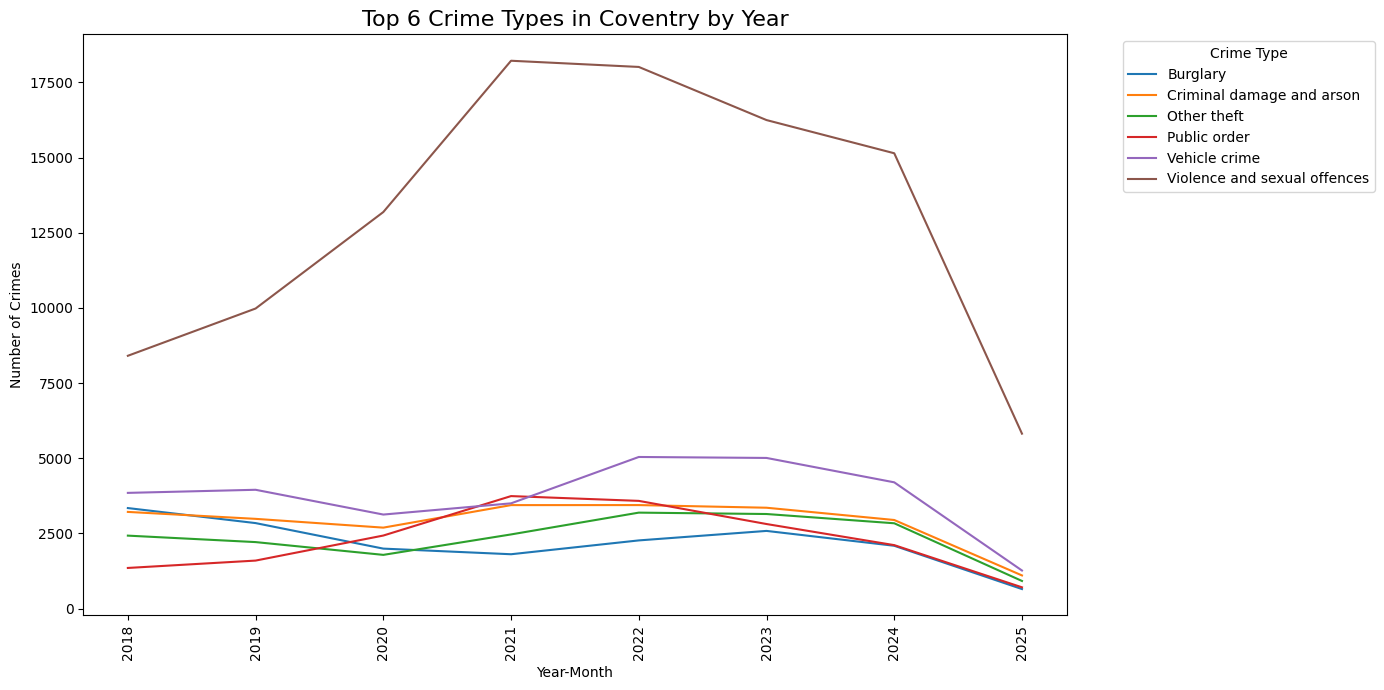

In [109]:
#crime type by year and month
top_6crime=Analysis_data['Crime type'].value_counts().head(6).index
top6=Analysis_data[Analysis_data['Crime type'].isin(top_6crime)]
crime_type = top6.groupby(['Year', 'Crime type']).size().reset_index(name='Count')

# # Pivot for plotting
pivot_data = crime_type.pivot(index='Year', columns='Crime type', values='Count').fillna(0)
#Plot line chart
plt.figure(figsize=(14, 7))
for col in pivot_data.columns:
    plt.plot(pivot_data.index.astype(str), pivot_data[col], label=col)

plt.title("Top 6 Crime Types in Coventry by Year", fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [110]:
pivot_data


Crime type  Burglary  Criminal damage and arson  Other theft  Public order  \
Year                                                                         
2018            3341                       3213         2424          1349   
2019            2841                       2982         2209          1594   
2020            1992                       2690         1784          2427   
2021            1805                       3439         2464          3739   
2022            2265                       3440         3189          3580   
2023            2581                       3352         3143          2810   
2024            2087                       2944         2835          2108   
2025             647                       1100          916           705   

Crime type  Vehicle crime  Violence and sexual offences  
Year                                                     
2018                 3846                          8406  
2019                 3949                          9978  
2020                 3125                         13187  
2021                 3498                         18219  
2022                 5040                         18013  
2023                 5008                         16246  
2024                 4197                         15142  
2025                 1264                          5816

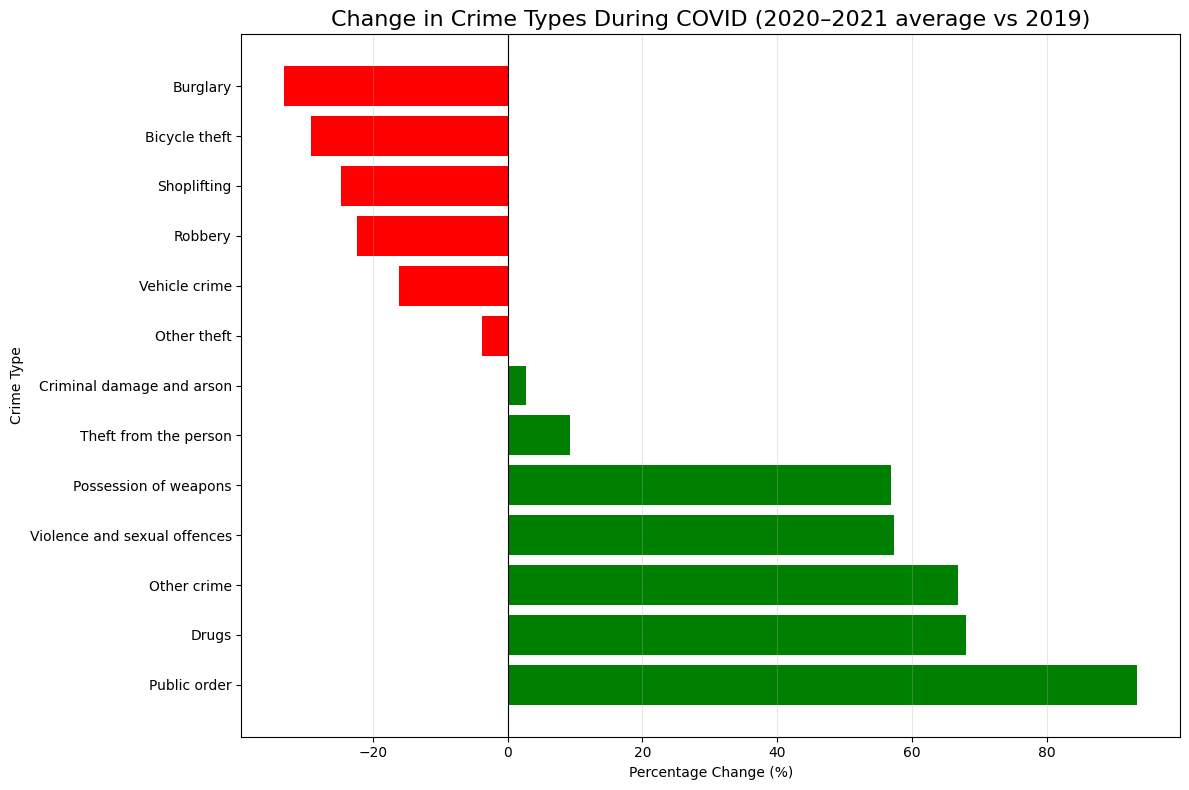

                              2019 (Pre-COVID)  2020-2021 Average  Change (%)
Crime type                                                                   
Public order                              1594             3083.0        93.4
Drugs                                      515              865.0        68.0
Other crime                                427              712.0        66.7
Violence and sexual offences              9978            15703.0        57.4
Possession of weapons                      304              477.0        56.9
Theft from the person                      272              297.0         9.2
Criminal damage and arson                 2982             3064.5         2.8
Other theft                               2209             2124.0        -3.8
Vehicle crime                             3949             3311.5       -16.1
Robbery                                    920              714.0       -22.4
Shoplifting                               1826             1375.

In [111]:
#Change in crime types during covid

#average of 2020 and 2021 vs 2019
pre_covid = Analysis_data[Analysis_data['Year'] == 2019]
covid_2020 = Analysis_data[Analysis_data['Year'] == 2020]
covid_2021 = Analysis_data[Analysis_data['Year'] == 2021]

# Count per year
crime_2019 = pre_covid['Crime type'].value_counts()
crime_2020 = covid_2020['Crime type'].value_counts()
crime_2021 = covid_2021['Crime type'].value_counts()

# Make average of the two covid years
crime_covid_avg = (crime_2020 + crime_2021) / 2

# Combine into dataframe
crime_compare = pd.DataFrame({
    "2019 (Pre-COVID)": crime_2019,
    "2020-2021 Average": crime_covid_avg
}).fillna(0)

# Calculate correct % change
crime_compare['Change (%)'] = ((crime_compare["2020-2021 Average"] - crime_compare["2019 (Pre-COVID)"]) /
                               crime_compare["2019 (Pre-COVID)"]) * 100

# Sort descending
crime_change = crime_compare.sort_values('Change (%)', ascending=False)

# Plot (this will now show red negative bars!)
plt.figure(figsize=(12, 8))
bars = plt.barh(crime_change.index, crime_change["Change (%)"], 
                color=["green" if x > 0 else "red" for x in crime_change["Change (%)"]])
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Change in Crime Types During COVID (2020–2021 average vs 2019)", fontsize=16)
plt.xlabel("Percentage Change (%)")
plt.ylabel("Crime Type")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Bonus: print the exact numbers so you can check
print(crime_change[['2019 (Pre-COVID)', '2020-2021 Average', 'Change (%)']].round(1))

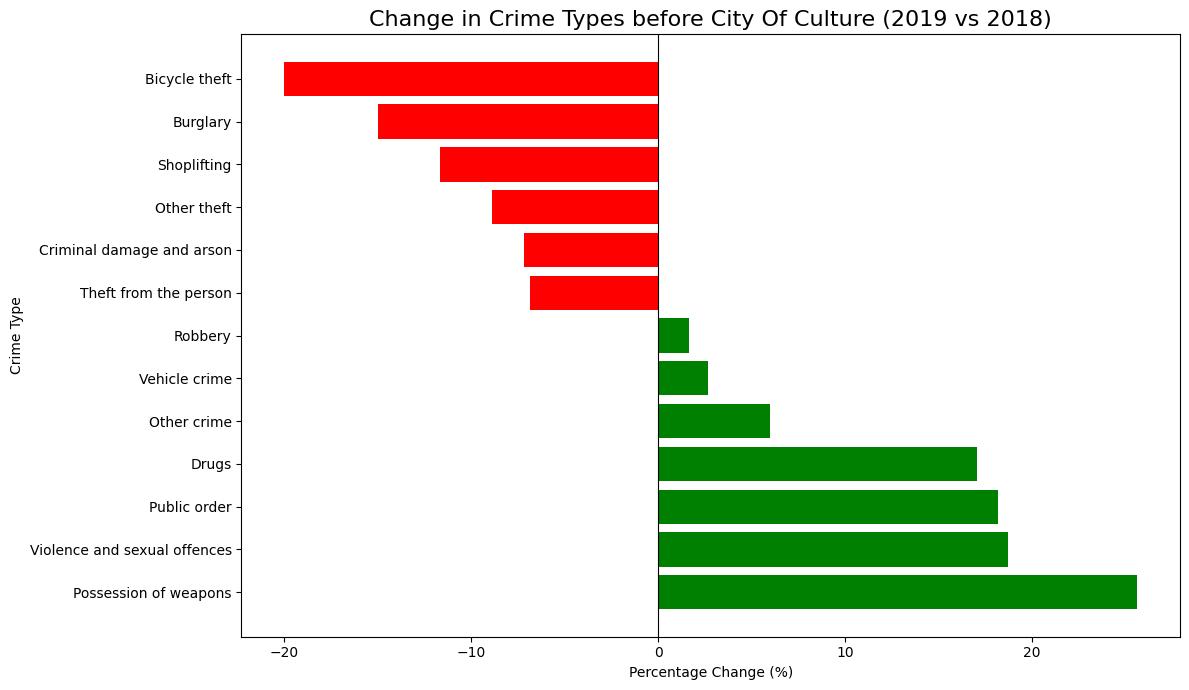

In [112]:
#what crime increased before covid year?
pre_covid_1 = Analysis_data[Analysis_data['Year'] == 2018]
pre_covid_2 = Analysis_data[Analysis_data['Year']==2019]

#crime type counts before covid
crime_2018 = pre_covid_1['Crime type'].value_counts()
crime_2019=pre_covid_2['Crime type'].value_counts()

#combining them as a dataframe
crime_compare = pd.DataFrame({
    "2018 (Pre-COVID)": crime_2018,
    "2019 (Pre-COVID)": crime_2019
}).fillna(0)

#Calculate % change
crime_compare['Change (%)'] = ((crime_compare["2019 (Pre-COVID)"] - crime_compare["2018 (Pre-COVID)"]) /
                               crime_compare["2018 (Pre-COVID)"]) * 100

#Sort by change
crime_compare = crime_compare.sort_values('Change (%)', ascending=False)

#
plt.figure(figsize=(12, 7))
bars = plt.barh(crime_compare.index, crime_compare["Change (%)"], color=["green" if x > 0 else "red" for x in crime_compare["Change (%)"]])

plt.axvline(0, color='black', linewidth=0.8)
plt.title("Change in Crime Types before City Of Culture (2019 vs 2018)", fontsize=16)
plt.xlabel("Percentage Change (%)")
plt.ylabel("Crime Type")

plt.tight_layout()
plt.show()




In [113]:
crime_2018 = pre_covid_1['Crime type'].value_counts()
crime_2019=pre_covid_2['Crime type'].value_counts()
print(crime_2019)
print(crime_2018)

Crime type
Violence and sexual offences    9978
Vehicle crime                   3949
Criminal damage and arson       2982
Burglary                        2841
Other theft                     2209
Shoplifting                     1826
Public order                    1594
Robbery                          920
Bicycle theft                    572
Drugs                            515
Other crime                      427
Possession of weapons            304
Theft from the person            272
Name: count, dtype: int64
Crime type
Violence and sexual offences    8406
Vehicle crime                   3846
Burglary                        3341
Criminal damage and arson       3213
Other theft                     2424
Shoplifting                     2067
Public order                    1349
Robbery                          905
Bicycle theft                    715
Drugs                            440
Other crime                      403
Theft from the person            292
Possession of weapons      

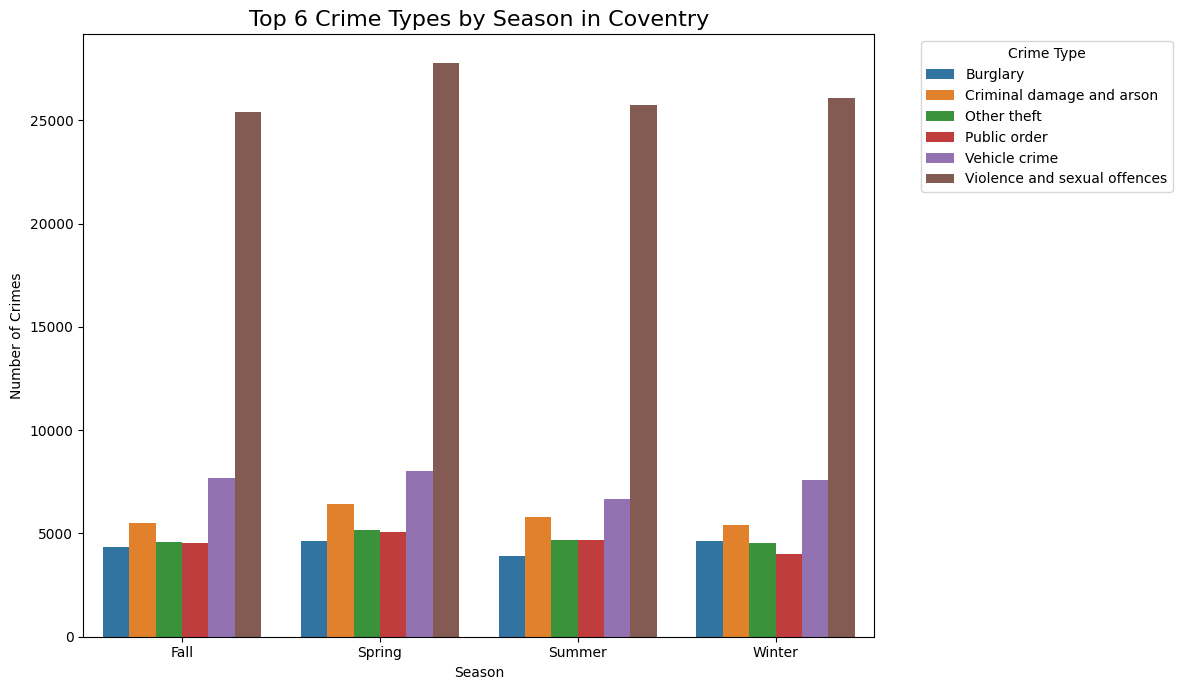

In [114]:
#seasonal crime types
top_6_crime=Analysis_data_reset['Crime type'].value_counts().head(6).index
top_6=Analysis_data_reset[Analysis_data_reset['Crime type'].isin(top_6_crime)]
seasonal_crime = top_6.groupby(['Crime type','Season']).size().reset_index(name='Count')

plt.figure(figsize=(12, 7))
sns.barplot(data=seasonal_crime, x='Season', y='Count', hue='Crime type')

plt.title("Top 6 Crime Types by Season in Coventry", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Geo-spatial analysis

In [115]:
#loading the new lsoa 2021 file
lsoa = gpd.read_file("/Users/deen/Desktop/crime analysis/LSOA_December_2021/LSOA_2021_EW_BGC_V5.shp")
#loading the look up file from ons
lookup = pd.read_csv("/Users/deen/Desktop/crime analysis/LSOA_(2011,2021) and LAD(2022)_Lookup.csv")
#Merging the shapefile with lookup by LSOA code
lsoa = lsoa.merge(lookup[["LSOA21CD", "LAD22NM"]], on="LSOA21CD", how="left")
#Filter for Coventry
coventry_lsoa = lsoa[lsoa["LAD22NM"] == "Coventry"]

print(coventry_lsoa.shape)
print(coventry_lsoa.head())
#saving the file
coventry_lsoa.to_file("coventry_lsoa.shp")



(195, 10)
       LSOA21CD       LSOA21NM LSOA21NMW   BNG_E   BNG_N      LAT     LONG  \
9038  E01009522  Coventry 014A      None  431915  280749  52.4238 -1.53209   
9039  E01009523  Coventry 010A      None  428678  282364  52.4385 -1.57956   
9040  E01009524  Coventry 006A      None  431799  282643  52.4408 -1.53362   
9041  E01009525  Coventry 006B      None  432279  282378  52.4384 -1.52658   
9042  E01009526  Coventry 010B      None  430815  281672  52.4322 -1.54818   

                                  GlobalID  \
9038  9008a0fd-76ae-4610-8e97-e1ed9945cfec   
9039  33e4820d-f91d-4fcf-9980-d5a81eb7bf22   
9040  a3ce51ba-0e02-40fd-8fc6-e792fc6bc6c8   
9041  aadbc278-eec1-4680-9cca-3a91770a3de6   
9042  bb548a6c-dd84-4fef-b4a9-76b9cce6e595   

                                               geometry   LAD22NM  
9038  POLYGON ((432119.974 280203.614, 432116.5 2801...  Coventry  
9039  POLYGON ((427962.594 284962.406, 428250.313 28...  Coventry  
9040  POLYGON ((431920.188 282904.187, 4

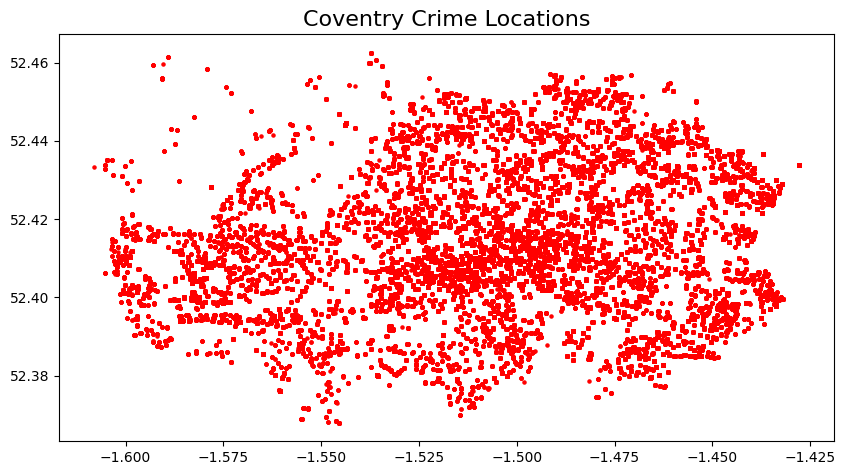

In [116]:
#Geographic Clustering
from shapely.geometry import Point
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(Analysis_data_reset['Longitude'], Analysis_data['Latitude'])]
gdf = gpd.GeoDataFrame(Analysis_data_reset, geometry=geometry)

# Plot crime locations
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title("Coventry Crime Locations", fontsize=16)
plt.show()

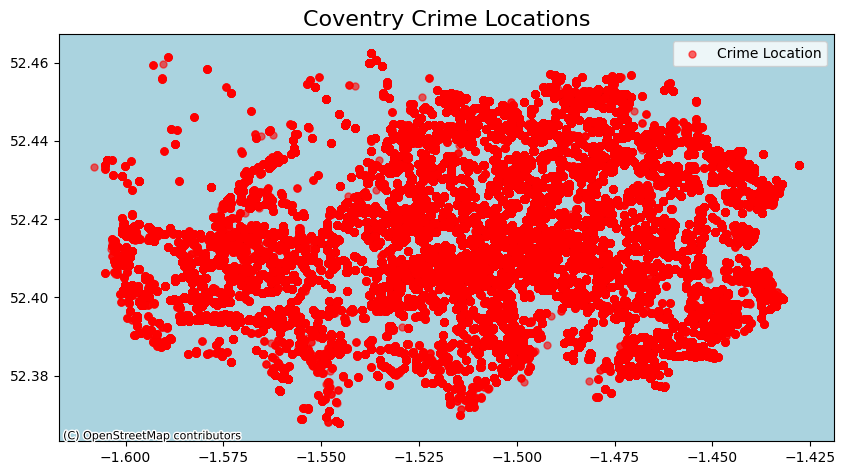

In [117]:
#plotting crime locations on a basemap
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='red', markersize=25, alpha=0.6, label='Crime Location')
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Coventry Crime Locations", fontsize=16)
ax.legend()
plt.show()

In [118]:
# Correlation between latitude and crime count (if aggregated)
print(Analysis_data[['Latitude', 'Longitude']].corr())


           Latitude  Longitude
Latitude    1.00000    0.16069
Longitude   0.16069    1.00000


In [119]:
crime_gdf = gpd.GeoDataFrame(
    Analysis_data_reset,
    geometry=gpd.points_from_xy(Analysis_data_reset["Longitude"], Analysis_data_reset["Latitude"]),
    crs="EPSG:4326"   # WGS84 lat/lon
)
#making sure the geodataframe and coventry_lso have the same crs
coventry_lsoa = coventry_lsoa.to_crs("EPSG:4326")

# Spatial join (assign each crime to an LSOA polygon)
crime_in_lsoa = gpd.sjoin(crime_gdf, coventry_lsoa, how="left", predicate="within")

crime_in_lsoa.head()

Month                                           Crime ID  Longitude  \
0 2018-01-01  7f68dd664aa52c902ffc440cf67eb62b7632260c88a851...  -1.513219   
1 2018-01-01  12c2855c6f37ead368aecbdd9a6adee5cf14bae0a624b8...  -1.527878   
2 2018-01-01  c9350bfe880c60df12c33bdec9d102ca616933f9276ad7...  -1.525230   
3 2018-01-01  7bd6e02dac714cce27ffb3a950d30005b51b0426c831da...  -1.537948   
4 2018-01-01  7889b41cf8d0a24a957212e7d1e70e62284f3203441f33...  -1.543697   

    Latitude                         Location                    Crime type  \
0  52.450724  On or near Houldsworth Crescent  Violence and sexual offences   
1  52.411820         On or near Shopping Area     Criminal damage and arson   
2  52.416143   On or near Barker'S Butts Lane     Criminal damage and arson   
3  52.417551            On or near Ralph Road  Violence and sexual offences   
4  52.418994       On or near Chelveston Road                 Vehicle crime   

       LSOA name  LSOA code                          Last outcome category  \
0  Coventry 043E  E01032587                    Unable to prosecute suspect   
1  Coventry 017C  E01009647  Investigation complete; no suspect identified   
2  Coventry 017C  E01009647  Investigation complete; no suspect identified   
3  Coventry 017B  E01009644                    Unable to prosecute suspect   
4  Coventry 017B  E01009644                       Court result unavailable   

   Year  ...  index_right   LSOA21CD       LSOA21NM LSOA21NMW     BNG_E  \
0  2018  ...      30932.0  E01032587  Coventry 043E      None  433458.0   
1  2018  ...       9146.0  E01009647  Coventry 017C      None  432136.0   
2  2018  ...       9132.0  E01009631  Coventry 020C      None  432587.0   
3  2018  ...       9143.0  E01009644  Coventry 017B      None  431304.0   
4  2018  ...       9143.0  E01009644  Coventry 017B      None  431304.0   

      BNG_N      LAT     LONG                              GlobalID   LAD22NM  
0  283649.0  52.4498 -1.50912  c9aed14a-2fad-49fa-84f2-971fc5ad93c3  Coventry  
1  279627.0  52.4137 -1.52895  8bd9e251-b10e-47f0-abc2-55ec12e91a99  Coventry  
2  279830.0  52.4155 -1.52230  4bc1afb1-a8e7-463e-99d1-215957aa3761  Coventry  
3  280250.0  52.4194 -1.54112  00a79887-ceb2-4fbd-81f2-83704c1d6d04  Coventry  
4  280250.0  52.4194 -1.54112  00a79887-ceb2-4fbd-81f2-83704c1d6d04  Coventry  

[5 rows x 24 columns]

In [120]:
#Group by LSOA and Crime Type 
# add the years (the years showed the count for each year)
crime_counts = (
    crime_in_lsoa
    .groupby(["LSOA21CD", "LSOA21NM", "Crime type"])
    .size()
    .reset_index(name="Total_Crimes")
)

print(crime_counts.head(10))


    LSOA21CD       LSOA21NM                 Crime type  Total_Crimes
0  E01009522  Coventry 014A                   Burglary            44
1  E01009522  Coventry 014A  Criminal damage and arson            59
2  E01009522  Coventry 014A                      Drugs            10
3  E01009522  Coventry 014A                Other crime            13
4  E01009522  Coventry 014A                Other theft            32
5  E01009522  Coventry 014A      Possession of weapons             5
6  E01009522  Coventry 014A               Public order            45
7  E01009522  Coventry 014A                    Robbery             6
8  E01009522  Coventry 014A      Theft from the person             3
9  E01009522  Coventry 014A              Vehicle crime           145


In [121]:
# Aggregate total crimes per LSOA (all categories combined)
crime_totals = (
    crime_in_lsoa.groupby("LSOA21CD").size().reset_index(name="Total_Crimes")
)

# Merge with LSOA polygons
merged = coventry_lsoa.merge(crime_totals, on="LSOA21CD", how="left")
numeric_cols = merged.select_dtypes(include=["number"]).columns
merged[numeric_cols] = merged[numeric_cols].fillna(0)


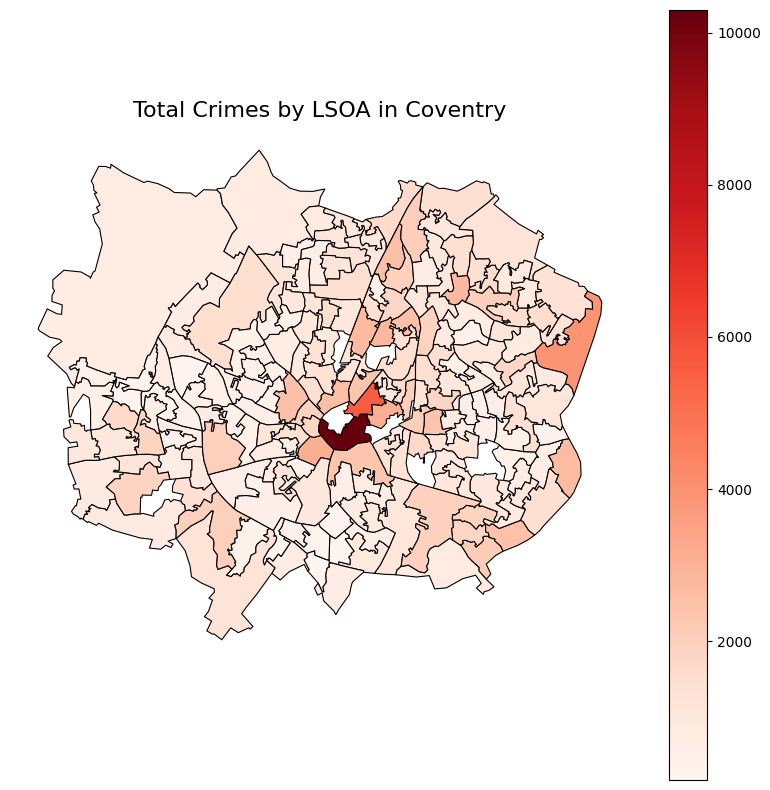

In [122]:
#Visualise as Choropleth
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(
    column="Total_Crimes",
    cmap="Reds",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True
)
ax.set_title("Total Crimes by LSOA in Coventry", fontsize=16)
ax.axis("off")
plt.show()


In [123]:
# top5 = Analysis_data_reset["Crime type"].value_counts().head(5).index

# fig, axes = plt.subplots(1, 5, figsize=(25, 6))
# for ax, crime in zip(axes, top5):
#     # Filter for one crime type
#     crime_sub = (
#         crime_counts[crime_counts["Crime type"] == crime]
#         .groupby("LSOA21CD")["Total_Crimes"]
#         .sum()
#         .reset_index()
#     )

#     # Merge into LSOA
#     merged = coventry_lsoa.merge(crime_sub, on="LSOA21CD", how="left")
#     numeric_cols = merged.select_dtypes(include=["number"]).columns
#     merged[numeric_cols] = lsoa_crime_map[numeric_cols].fillna(0)

#     # Plot
#     merged.plot(
#         column="Total_Crimes",
#         cmap="Reds",
#         ax=ax,
#         edgecolor="black",
#         legend=False
#     )
#     ax.set_title(crime)
#     ax.axis("off")

# plt.suptitle("Top 5 Crime Categories by LSOA in Coventry", fontsize=18)
# plt.show()


In [124]:
#Base map centered on Coventry
import folium
m = folium.Map(location=[Analysis_data_reset["Latitude"].mean(), Analysis_data_reset["Longitude"].mean()], zoom_start=12)

# Loop through top 6 crime categories

    
# Adding choropleth layer
folium.Choropleth(
        geo_data=merged,
        name='crime',
        data=merged,
        columns=["LSOA21CD", "Total_Crimes"],
        key_on="feature.properties.LSOA21CD",
        fill_color="YlOrRd",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Total Crime Counts (2018–2025)',
        bins=6,  # Key fix: reduce to 6–8 bins for clean legend (adjust as needed)
        smooth_factor=0.0,  # Prevents jagged legend
        
    ).add_to(m)

    # Adding tooltips (hover labels)
folium.GeoJson(
        merged,
        name=f" tooltip",
        style_function=lambda x: {"fillColor": "transparent", "color": "black", 'Weight':1,'fillOpacity':0},
        tooltip=folium.GeoJsonTooltip(
            fields=["LSOA21NM", "Total_Crimes"],
            aliases=["Neighbourhood:", "Crimes:"],
            localize=True,
            sticky=False
        )
    ).add_to(m)



# Save to interactive HTML
m.save("/Users/Deen/Desktop/crime analysis/map/coventry_total_crime_interactive_map.html")
m


# Deprivation analysis

In [125]:
#loading deprivation file (IMD)
deprivation=pd.read_csv('/Users/deen/Desktop/crime analysis/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv') 
deprivation.rename(columns={'LSOA code (2011)': 'LSOA code','LSOA name (2011)': 'LSOA name'}, inplace=True)
#filtering for coventry alone
coventry_deprivation=deprivation[deprivation['LSOA name'].str.startswith('Coventry')]
deprivation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 57 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   LSOA code                                                                                           32844 non-null  object 
 1   LSOA name                                                                                           32844 non-null  object 
 2   Local Authority District code (2019)                                                                32844 non-null  object 
 3   Local Authority District name (2019)                                                                32844 non-null  object 
 4   Index of Multiple Deprivation (IMD) Score                                                           32844 non-nu

In [126]:
coventry_deprivation

LSOA code      LSOA name Local Authority District code (2019)  \
9242   E01009522  Coventry 014A                            E08000026   
9243   E01009523  Coventry 010A                            E08000026   
9244   E01009524  Coventry 006A                            E08000026   
9245   E01009525  Coventry 006B                            E08000026   
9246   E01009526  Coventry 010B                            E08000026   
...          ...            ...                                  ...   
31724  E01032536  Coventry 001F                            E08000026   
31725  E01032537  Coventry 001G                            E08000026   
31726  E01032538  Coventry 001H                            E08000026   
31772  E01032587  Coventry 043E                            E08000026   
32208  E01033058  Coventry 042F                            E08000026   

      Local Authority District name (2019)  \
9242                              Coventry   
9243                              Coventry   
9244                              Coventry   
9245                              Coventry   
9246                              Coventry   
...                                    ...   
31724                             Coventry   
31725                             Coventry   
31726                             Coventry   
31772                             Coventry   
32208                             Coventry   

       Index of Multiple Deprivation (IMD) Score  \
9242                                      24.444   
9243                                      16.097   
9244                                      29.000   
9245                                      16.244   
9246                                      12.743   
...                                          ...   
31724                                     27.154   
31725                                     22.628   
31726                                     36.241   
31772                                     26.907   
32208                                     16.180   

       Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
9242                                               11101                     
9243                                               17853                     
9244                                                8491                     
9245                                               17711                     
9246                                               21338                     
...                                                  ...                     
31724                                               9501                     
31725                                              12303                     
31726                                               5452                     
31772                                               9643                     
32208                                              17768                     

       Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)  \
9242                                                   4                                    
9243                                                   6                                    
9244                                                   3                                    
9245                                                   6                                    
9246                                                   7                                    
...                                                  ...                                    
31724                                                  3                                    
31725                                                  4                                    
31726                                                  2                                    
31772                                                  3                                    
3220

In [127]:
#picking the right features 
useful_features=['LSOA code', 'LSOA name',
                 'Income Score (rate)', 
                 'Education, Skills and Training Score',
                'Health Deprivation and Disability Score',
                'Barriers to Housing and Services Score',
                'Living Environment Score',
                'Children and Young People Sub-domain Score',
                'Total population: mid 2015 (excluding prisoners)',
                'Dependent Children aged 0-15: mid 2015 (excluding prisoners)',
                'Population aged 16-59: mid 2015 (excluding prisoners)',
                "Older population aged 60 and over: mid 2015 (excluding prisoners)"]
imd=coventry_deprivation[useful_features]
#filtering a single crime for 2019 
one_crime=Analysis_data_reset[Analysis_data_reset['Crime type']=='Violence and sexual offences']
crime_2019=(one_crime[one_crime['Year']==2019]
            .groupby('LSOA name').size().reset_index(name='Total_Crimes')
          )
#merging with coventry IMD (for correlation Analysis)
crime_total=Analysis_data_reset.groupby(['Year','LSOA name']).size().reset_index(name='Total_Crimes')
crime_deprivation=crime_total.merge(imd, on='LSOA name', how='left')

#merging with coventry imd for 2019 correlation
crime_deprivation_2019 = crime_2019.merge(imd, on="LSOA name", how="left")

crime_deprivation_2019.info()




                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   LSOA name                                                          195 non-null    object 
 1   Total_Crimes                                                       195 non-null    int64  
 2   LSOA code                                                          195 non-null    object 
 3   Income Score (rate)                                                195 non-null    float64
 4   Education, Skills and Training Score                               195 non-null    float64
 5   Health Deprivation and Disability Score                            195 non-null    float64
 6   Barriers to Housing and Services Score                             195 non-null    float64
 7   Living Environment Score  

In [128]:
crimesss=(one_crime[one_crime['Year']==2019]
            .groupby('Crime type').size()
          )
crimesss

Crime type
Violence and sexual offences    9978
dtype: int64

# Correlation Analysis for 2018-2025 (Trying to see if deprivation correlates with crime )

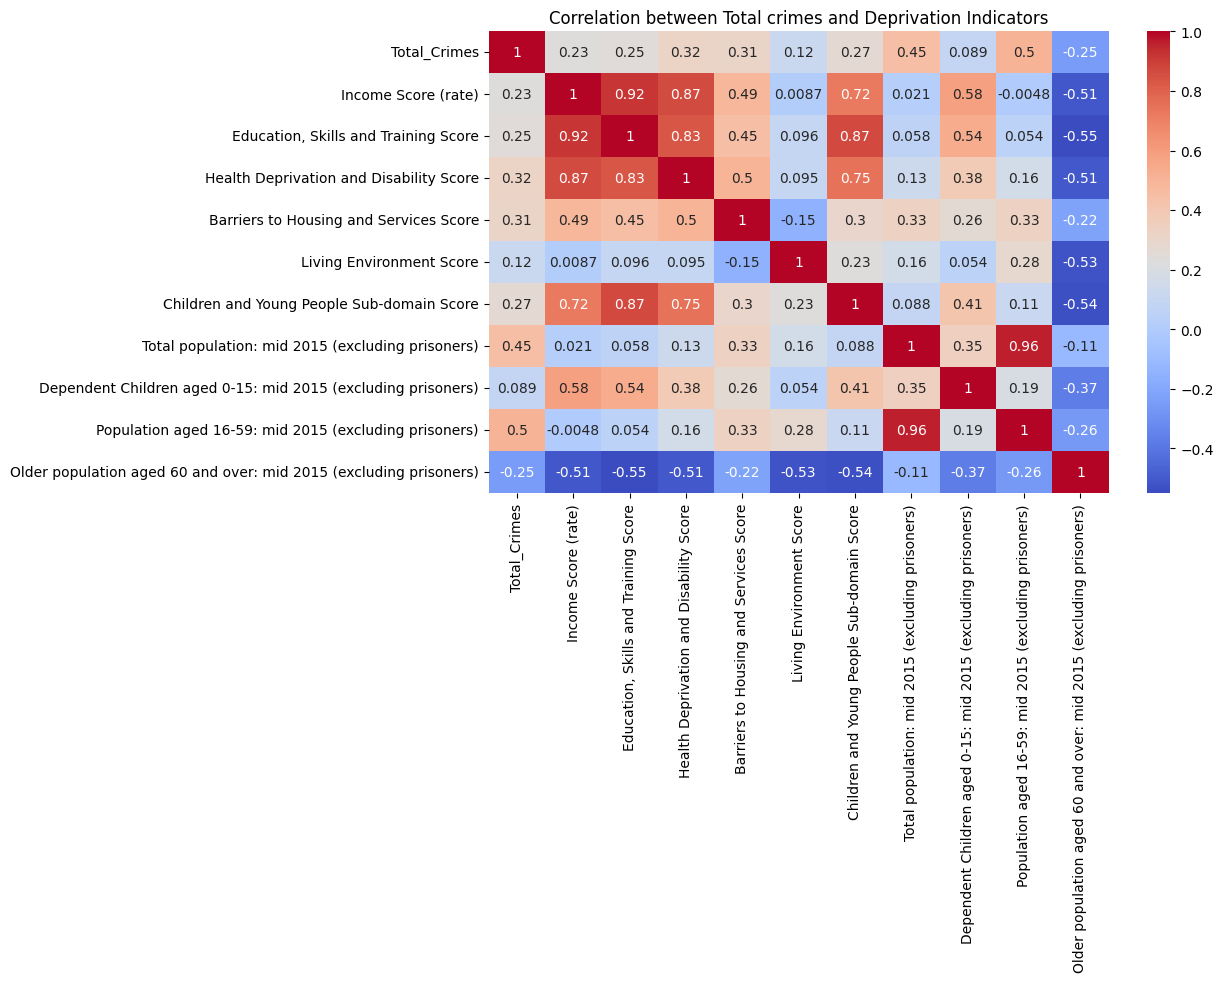

Total_Crimes                                                         1.000000
Population aged 16-59: mid 2015 (excluding prisoners)                0.503758
Total population: mid 2015 (excluding prisoners)                     0.454344
Health Deprivation and Disability Score                              0.315832
Barriers to Housing and Services Score                               0.313274
Children and Young People Sub-domain Score                           0.272144
Education, Skills and Training Score                                 0.247307
Income Score (rate)                                                  0.232158
Living Environment Score                                             0.115157
Dependent Children aged 0-15: mid 2015 (excluding prisoners)         0.089194
Older population aged 60 and over: mid 2015 (excluding prisoners)   -0.251211
Name: Total_Crimes, dtype: float64


In [129]:
# Select numerical variables
numeric_cols = crime_deprivation.select_dtypes(include=['float64', 'int64'])
corr=numeric_cols.corr()
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Total crimes and Deprivation Indicators")
plt.show()

# Look specifically at correlation of crime with others
print(corr["Total_Crimes"].sort_values(ascending=False))

# Correlation Analysis for 2019 (Trying to see if deprivation correlates with crime )

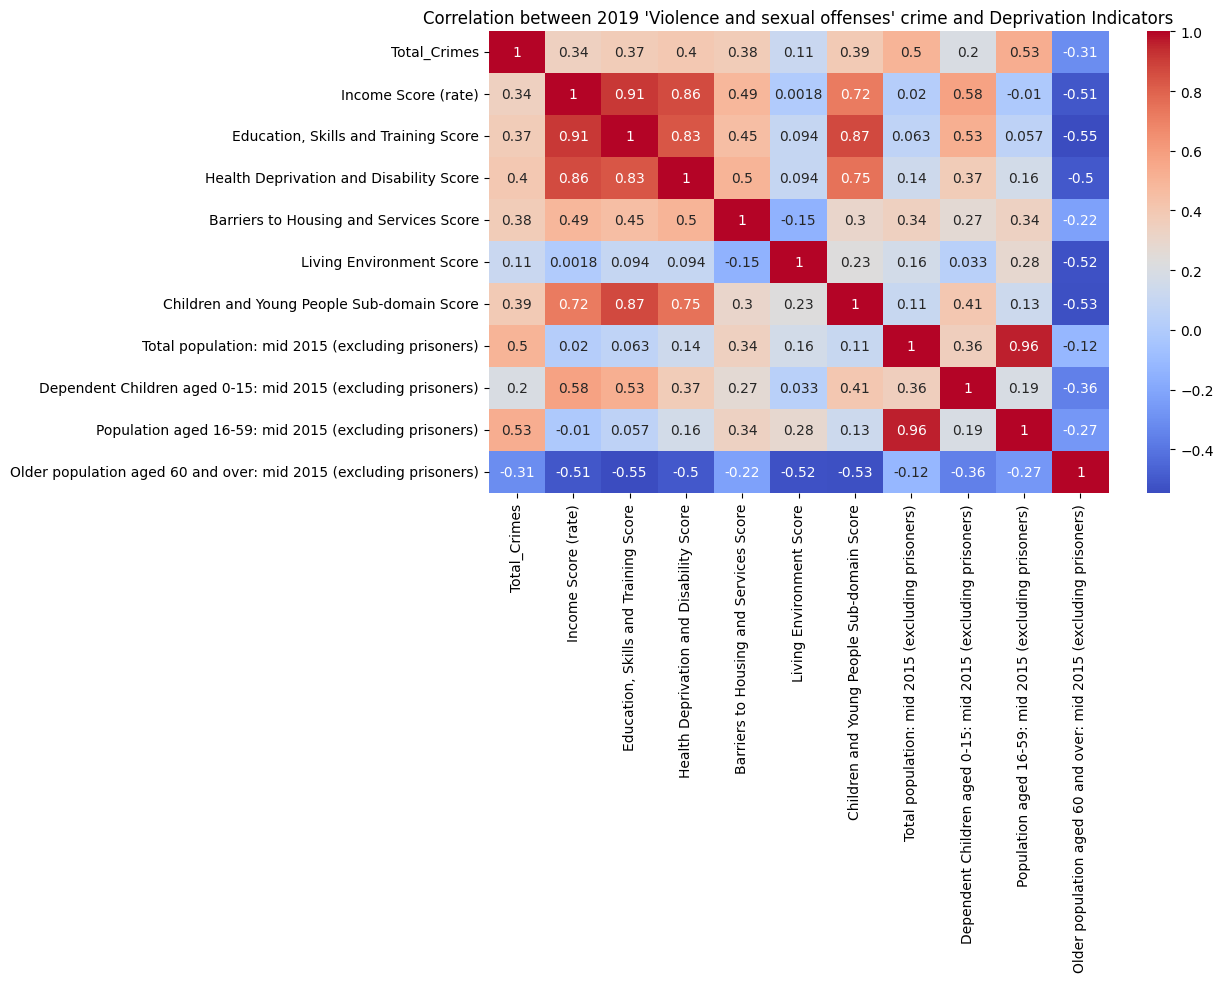

Total_Crimes                                                         1.000000
Population aged 16-59: mid 2015 (excluding prisoners)                0.533893
Total population: mid 2015 (excluding prisoners)                     0.499962
Health Deprivation and Disability Score                              0.399378
Children and Young People Sub-domain Score                           0.388372
Barriers to Housing and Services Score                               0.375012
Education, Skills and Training Score                                 0.372575
Income Score (rate)                                                  0.343945
Dependent Children aged 0-15: mid 2015 (excluding prisoners)         0.199507
Living Environment Score                                             0.114203
Older population aged 60 and over: mid 2015 (excluding prisoners)   -0.311377
Name: Total_Crimes, dtype: float64


In [130]:
# Select numerical variables
numeric_cols = crime_deprivation_2019.select_dtypes(include=['float64', 'int64'])
corr=numeric_cols.corr()
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between 2019 'Violence and sexual offenses' crime and Deprivation Indicators")
plt.show()

# Look specifically at correlation of crime with others
print(corr["Total_Crimes"].sort_values(ascending=False))


# Machine Learning

In [131]:
#Normalising crime counts(per 1000 population)
crime_deprivation_2019["crime_rate"] = (
    crime_deprivation_2019["Total_Crimes"] / 
    crime_deprivation_2019["Total population: mid 2015 (excluding prisoners)"]
) * 1000


In [132]:
# Using median to Create binary target (1 = high crime, 0 = low crime)
median_rate = crime_deprivation_2019["crime_rate"].median()
crime_deprivation_2019["high_crime"] = (crime_deprivation_2019["crime_rate"] > median_rate).astype(int)

# Checking balance
print(crime_deprivation_2019["high_crime"].value_counts())


high_crime
0    98
1    97
Name: count, dtype: int64


In [133]:
# Features (droping identifiers, text, and target) (based on correlation >0.3)
features = [
   "Income Score (rate)",
    "Education, Skills and Training Score",
    "Health Deprivation and Disability Score",
    "Barriers to Housing and Services Score",
    "Children and Young People Sub-domain Score",
    "Population aged 16-59: mid 2015 (excluding prisoners)"
]
X = crime_deprivation_2019[features]
# Target
y = crime_deprivation_2019["high_crime"]


In [134]:
# Train =70, Test = 30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)




Train shape: (136, 6)
Test shape: (59, 6)


In [135]:
#Feature Scaling (Normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [136]:
# Training models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Logistic regression 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # RF doesn’t need scaling

#predictions 
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf  = rf.predict(X_test)

# 7. Evaluation
print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))

print("\n=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.78      0.72      0.75        29

    accuracy                           0.76        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.76      0.76      0.76        59


=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.78      0.86      0.82        29

    accuracy                           0.81        59
   macro avg       0.82      0.81      0.81        59
weighted avg       0.82      0.81      0.81        59



# cross validation 

In [165]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


X = crime_deprivation_2019[features]
# Target
y = crime_deprivation_2019["high_crime"]

# Random Forest model
rf_cv = RandomForestClassifier(n_estimators=200, random_state=42)
#logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# 5-fold stratified cross-validation (preserves class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

# Get accuracy for each fold
cv_scores = cross_val_score(rf_cv, X, y, cv=cv, scoring='accuracy') #RF
cv_scores_lr = cross_val_score(log_reg, X, y, cv=cv, scoring='accuracy') #Lr


# Print results
print("5-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))
print("Range: {:.2f} – {:.2f}".format(cv_scores.min(), cv_scores.max()))

print("Logistic Regression 5-Fold CV Accuracy Scores:", np.round(cv_scores_lr, 2))
print("Mean CV Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores_lr.mean(), cv_scores_lr.std() * 2))
print("Range: {:.2f} – {:.2f}".format(cv_scores_lr.min(), cv_scores_lr.max()))

5-Fold CV Accuracy Scores: [0.82051282 0.76923077 0.71794872 0.79487179 0.76923077]
Mean CV Accuracy: 0.77 (+/- 0.07)
Range: 0.72 – 0.82
Logistic Regression 5-Fold CV Accuracy Scores: [0.79 0.77 0.82 0.87 0.79]
Mean CV Accuracy: 0.81 (+/- 0.07)
Range: 0.77 – 0.87


In [138]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, '/Users/Deen/Desktop/crime analysis/rf_model.pkl')

print("Random Forest model saved correctly as rf_model.pkl")
print("Type:", type(rf))  # Should print <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Random Forest model saved correctly as rf_model.pkl
Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


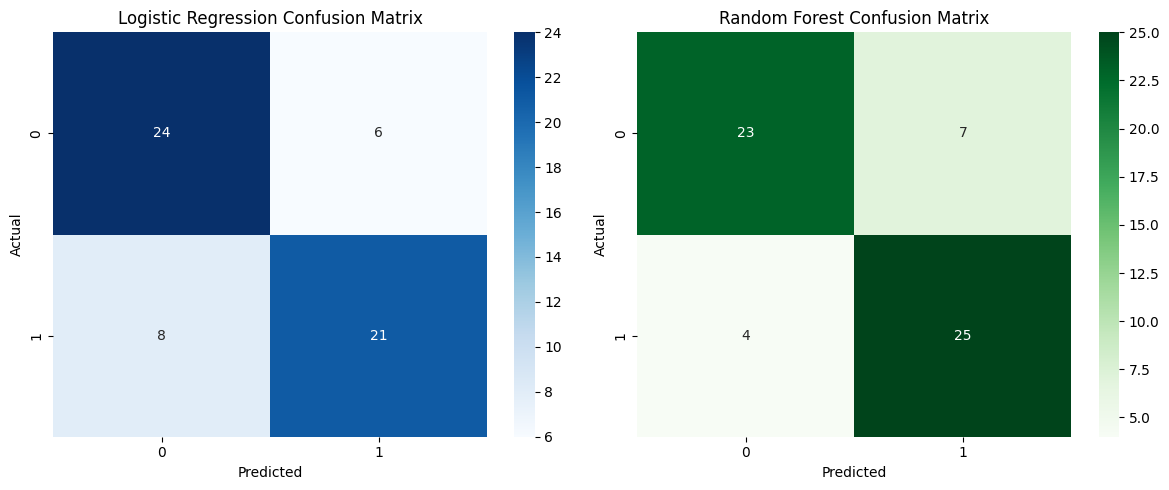

In [139]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# feature importances

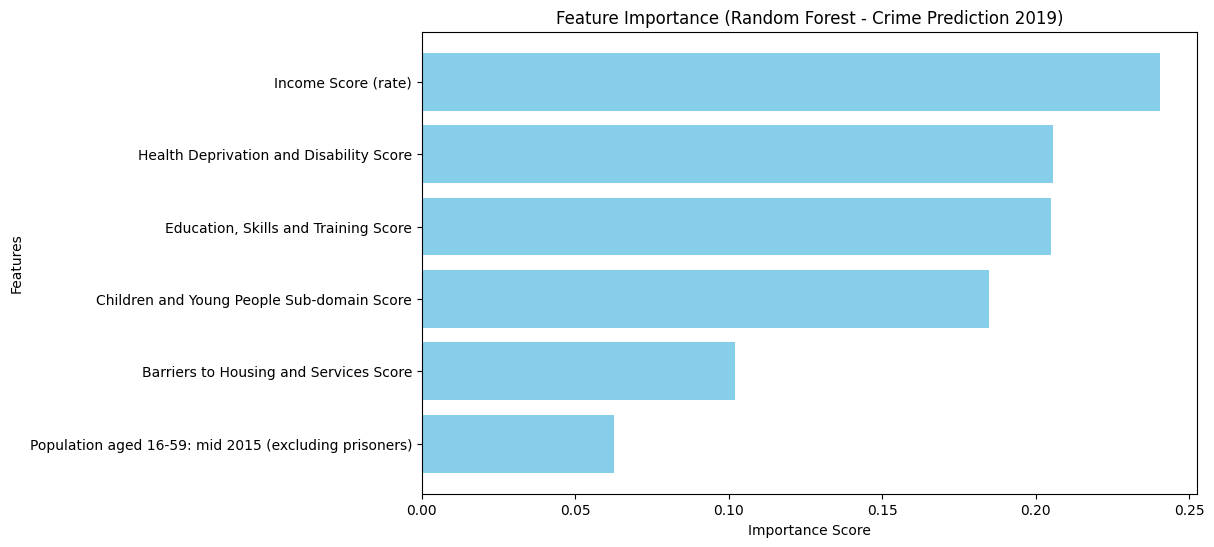

In [140]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest - Crime Prediction 2019)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()



In [141]:
feature_importances

Feature  Importance
0                                Income Score (rate)    0.240427
2            Health Deprivation and Disability Score    0.205506
1               Education, Skills and Training Score    0.204826
4         Children and Young People Sub-domain Score    0.184639
3             Barriers to Housing and Services Score    0.101927
5  Population aged 16-59: mid 2015 (excluding pri...    0.062675

# Adding my random forest prediction to a map

In [142]:
# Creating a copy of my test set and attaching random forest predictions
test_data = X_test.copy()
test_data["prediction"] = rf.predict(X_test_scaled)
test_data["LSOA code"] = crime_deprivation_2019.loc[test_data.index, "LSOA code"]

# Loading coventry shapefile and lookup file
shapefile = gpd.read_file("/Users/deen/Desktop/crime analysis/LSOA_December_2021/LSOA_2021_EW_BGC_V5.shp")
coventry_shapefile=shapefile[shapefile["LSOA21NM"].str.startswith('Coventry')]
lookup = pd.read_csv("/Users/deen/Desktop/crime analysis/LSOA_(2011,2021) and LAD(2022)_Lookup.csv")  # maps LSOA11CD → LSOA21CD

# aligning lsoa codes using lookup
test_data_lookup = test_data.merge(
    lookup[["LSOA11CD", "LSOA21CD"]],
    left_on="LSOA code", right_on="LSOA11CD", how="left"
)

# Merging predictions with Coventry shapefile (using 2021 code)
coventry_pred = coventry_shapefile.merge(
    test_data_lookup,
    left_on="LSOA21CD", right_on="LSOA21CD",
    how="left"
)


#Creating Folium interactive map
m = folium.Map(location=[52.4068, -1.5197], zoom_start=11, tiles="cartodbpositron")

# Adding choropleth
folium.Choropleth(
    geo_data=coventry_pred,
    data=coventry_pred,
    columns=["LSOA21CD", "prediction"],
    key_on="feature.properties.LSOA21CD",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="Predicted Crime Risk (1 = High, 0 = Low)"
).add_to(m)

# Adding hover tooltip
folium.GeoJson(
    coventry_pred,
    name="Predicted Crime Hotspots (2019)",
    tooltip=folium.GeoJsonTooltip(
        fields=["LSOA21NM", "prediction"],
        aliases=["LSOA Name:", "Predicted Crime Risk:"],
        localize=True,
        sticky=True
    )
).add_to(m)

folium.LayerControl().add_to(m)

#Save and display
m.save("/Users/Deen/Desktop/crime analysis/map/coventry_predicted_hotspots_2019.html")
m

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


cluster
0    108
2     76
1     11
Name: count, dtype: int64


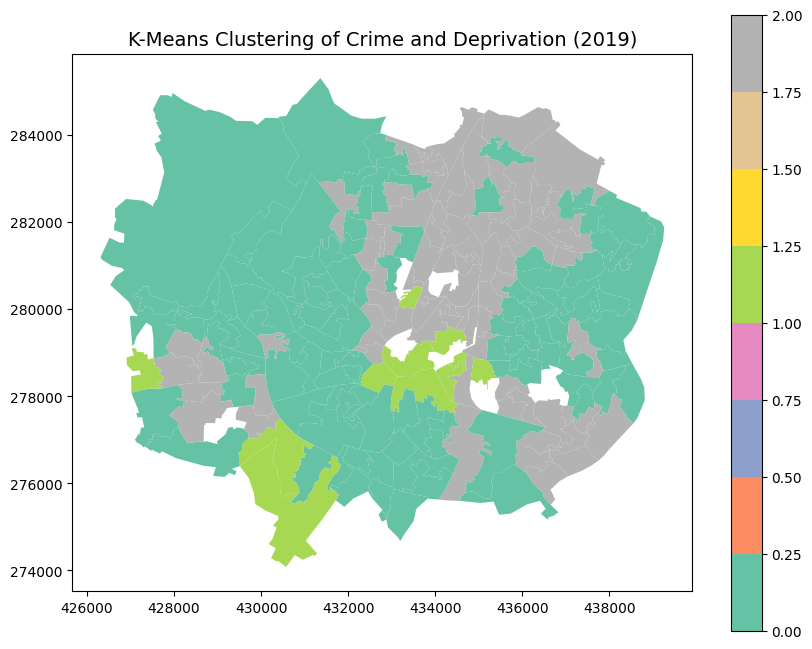

In [143]:
from sklearn.cluster import KMeans

# Scale features
features = [
   "Income Score (rate)",
    "Education, Skills and Training Score",
    "Health Deprivation and Disability Score",
    "Barriers to Housing and Services Score",
    "Children and Young People Sub-domain Score",
    "Population aged 16-59: mid 2015 (excluding prisoners)"
]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_deprivation_2019[features])

# Runing K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
crime_deprivation_2019["cluster"] = kmeans.fit_predict(X_scaled)

# checking cluster counts
print(crime_deprivation_2019["cluster"].value_counts())

# Merging 2019 data with lookup file to align code versions
crime_deprivation_lookup = crime_deprivation_2019.merge(
    lookup[["LSOA11CD", "LSOA21CD"]],
    left_on="LSOA code", right_on="LSOA11CD", how="left"
)

# Merging with my Coventry shapefile
coventry_cluster = coventry_shapefile.merge(
    crime_deprivation_lookup[["LSOA21CD", "LSOA name", "Total_Crimes", "cluster"]],
    on="LSOA21CD", how="left"
)


# Plot clusters
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
coventry_cluster.plot(column="cluster", cmap="Set2", legend=True, ax=ax)
ax.set_title("K-Means Clustering of Crime and Deprivation (2019)", fontsize=14)
plt.show()


# Create the base map centered on Coventry
m = folium.Map(location=[52.4068, -1.5197], zoom_start=11, tiles="cartodbpositron")

# Adding the choropleth layer
folium.Choropleth(
    geo_data=coventry_cluster,
    data=coventry_cluster,
    columns=["LSOA21CD", "cluster"],
    key_on="feature.properties.LSOA21CD",
    fill_color="Set2",
    fill_opacity=0.8,
    line_opacity=0.4,
    legend_name="K-Means Crime & Deprivation Clusters (2019)"
).add_to(m)

# Adding hover tooltips for interactive exploration
folium.GeoJson(
    coventry_cluster,
    style_function=lambda x: {"fillColor": "transparent", "color": "black", "weight": 0.1},
    tooltip=folium.GeoJsonTooltip(
        fields=["LSOA21NM", "cluster", "Total_Crimes"],
        aliases=["LSOA Name:", "Cluster ID:", "Total Crimes:"],
        localize=True
    )
).add_to(m)

# Save and display
m.save("/Users/Deen/Desktop/crime analysis/map/coventry_kmeans_clusters_2019.html")



In [144]:
#checking kmeans result (confirming why a lsoa has low crime)
crime_deprivation_2019[crime_deprivation_2019['LSOA name']=='Coventry 033D']

LSOA name  Total_Crimes  LSOA code  Income Score (rate)  \
145  Coventry 033D            37  E01009543                0.026   

     Education, Skills and Training Score  \
145                                 4.777   

     Health Deprivation and Disability Score  \
145                                   -0.627   

     Barriers to Housing and Services Score  Living Environment Score  \
145                                  26.214                     9.029   

     Children and Young People Sub-domain Score  \
145                                      -1.065   

     Total population: mid 2015 (excluding prisoners)  \
145                                              1817   

     Dependent Children aged 0-15: mid 2015 (excluding prisoners)  \
145                                                356              

     Population aged 16-59: mid 2015 (excluding prisoners)  \
145                                               1207       

     Older population aged 60 and over: mid 2015 (excluding prisoners)  \
145                                                254                   

     crime_rate  high_crime  cluster  
145   20.363236           0        0

In [145]:
missing = test_data[~test_data["LSOA code"].isin(lookup["LSOA11CD"])]
print(missing)


Empty DataFrame
Columns: [Income Score (rate), Education, Skills and Training Score, Health Deprivation and Disability Score, Barriers to Housing and Services Score, Children and Young People Sub-domain Score, Population aged 16-59: mid 2015 (excluding prisoners), prediction, LSOA code]
Index: []


In [146]:
# Checking if that LSOA exists in each dataset
print("In full 2019 data:", "E01009543" in crime_deprivation_2019["LSOA code"].values)
print("In test data:", "E01009543" in test_data["LSOA code"].values)
print("In lookup:", "E01009543" in lookup["LSOA11CD"].values)


In full 2019 data: True
In test data: False
In lookup: True


db_cluster
-1    99
 0    91
 1     5
Name: count, dtype: int64


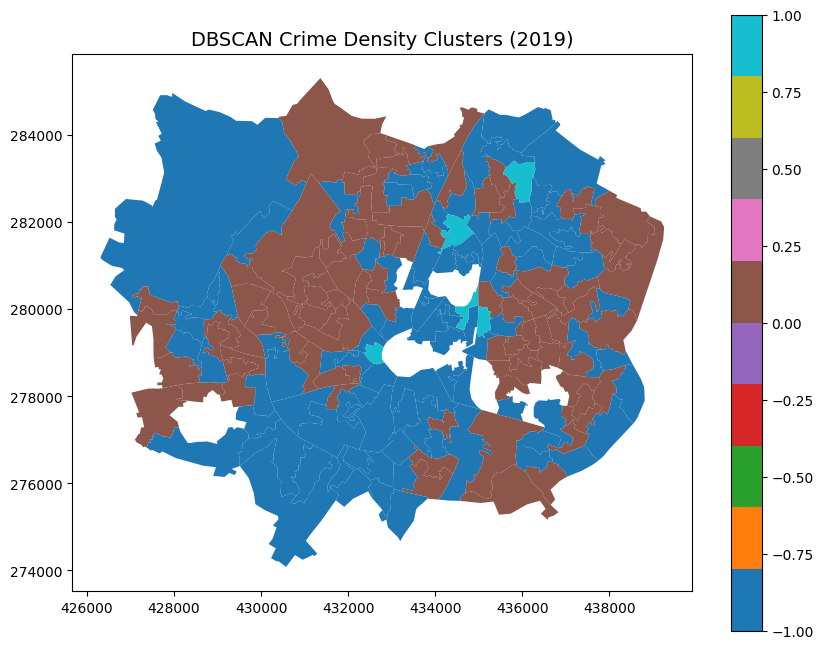

In [147]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.7, min_samples=5)
crime_deprivation_2019["db_cluster"] = db.fit_predict(X_scaled)

# -1 = noise, others are cluster labels
print(crime_deprivation_2019["db_cluster"].value_counts())

# Plot DBSCAN results
coventry_db = coventry_shapefile.merge(
    crime_deprivation_2019[["LSOA code", "db_cluster", 'Total_Crimes']],
    left_on="LSOA21CD", right_on="LSOA code", how="left"
)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
coventry_db.plot(column="db_cluster", cmap="tab10", legend=True, ax=ax)
ax.set_title("DBSCAN Crime Density Clusters (2019)", fontsize=14)
plt.show()

# Create the base map centered on Coventry
m = folium.Map(location=[52.4068, -1.5197], zoom_start=11, tiles="cartodbpositron")

# Adding the choropleth layer
folium.Choropleth(
    geo_data=coventry_db,
    data=coventry_db,
    columns=["LSOA21CD", "db_cluster"],
    key_on="feature.properties.LSOA21CD",
    fill_color="Spectral",
    fill_opacity=0.8,
    line_opacity=0.4,
    legend_name="DBSCAN Crime Density Clusters (2019)"
).add_to(m)

# Adding hover tooltips for interactive exploration
folium.GeoJson(
    coventry_db,
    style_function=lambda x: {"fillColor": "transparent", "color": "black", "weight": 0.1},
    tooltip=folium.GeoJsonTooltip(
        fields=["LSOA21NM", "db_cluster", "Total_Crimes"],
        aliases=["LSOA Name:", "Cluster ID:", "Total Crimes:"],
        localize=True
    )
).add_to(m)

# Save and display
m.save("/Users/Deen/Desktop/crime analysis/map/DBSCAN_clusters_2019.html")




# Anomaly

In [148]:
# Find what Coventry 019E maps to in lookup
lookup[lookup['LSOA21NM'].str.contains("Coventry 019E", case=False)]


ObjectId   LSOA11CD       LSOA11NM   LSOA21CD       LSOA21NM    LAD22CD  \
9222      9223  E01009718  Coventry 019E  E01009718  Coventry 019E  E08000026   

       LAD22NM LAD22NMW  
9222  Coventry      NaN

In [149]:
#filtering for the lsoa with anomaly using the ML dataset
anomaly=crime_deprivation_2019[crime_deprivation_2019['LSOA name']=='Coventry 019E']
anomaly


LSOA name  Total_Crimes  LSOA code  Income Score (rate)  \
82  Coventry 019E           114  E01009718                0.308   

    Education, Skills and Training Score  \
82                                 36.89   

    Health Deprivation and Disability Score  \
82                                     1.72   

    Barriers to Housing and Services Score  Living Environment Score  \
82                                  31.215                    17.856   

    Children and Young People Sub-domain Score  \
82                                       0.555   

    Total population: mid 2015 (excluding prisoners)  \
82                                              1886   

    Dependent Children aged 0-15: mid 2015 (excluding prisoners)  \
82                                                360              

    Population aged 16-59: mid 2015 (excluding prisoners)  \
82                                               1083       

    Older population aged 60 and over: mid 2015 (excluding prisoners)  \
82                                                443                   

    crime_rate  high_crime  cluster  db_cluster  
82   60.445387           1        2          -1

In [150]:
#fetching the lsoa geographic coordinates
coventry_shapefile=coventry_shapefile.to_crs(epsg=4326)
target_lsoa = coventry_shapefile.loc[coventry_shapefile["LSOA21CD"] == "E01009718"]
centroid = target_lsoa.geometry.iloc[0].centroid
print(centroid.y, centroid.x)  # lat, lon


52.40882010048338 -1.4516485492902047


In [151]:
import osmnx as ox

# find amenities (e.g. pubs, bars, bus stations) within 1000m of the centroid
tags = {'amenity': ['pub', 'bar', 'nightclub', 'bus_station', 'restaurant']}
poi = ox.features_from_point((centroid.y, centroid.x), tags=tags, dist=1000)

print(poi[['amenity', 'name']])


                      amenity            name
element id                                   
way     223994358         pub    The Millpool
        224102735         pub    Painted Lady
        484081150  restaurant    Toby Carvery
        494245733         pub  The New Pippin
        529492839  restaurant      China Chef


# Visualisation 

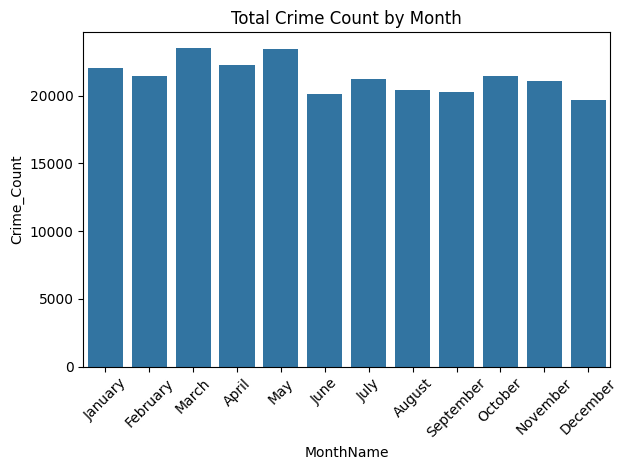

In [152]:

sns.barplot(data=monthly_counts, x='MonthName', y='Crime_Count')
plt.title('Total Crime Count by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

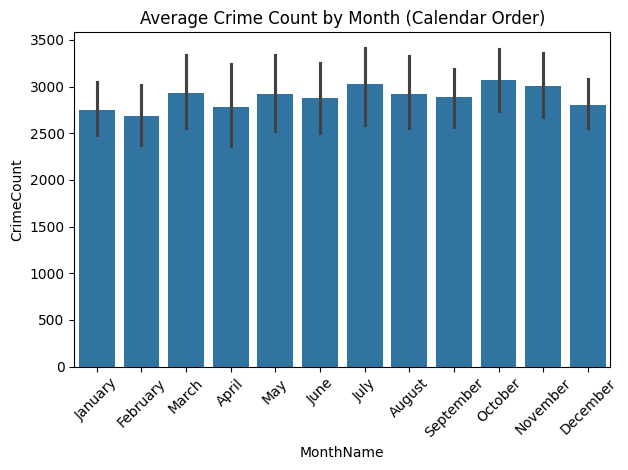

In [153]:
sns.barplot(data=monthly_crime, x='MonthName', y='CrimeCount')
plt.title('Average Crime Count by Month (Calendar Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

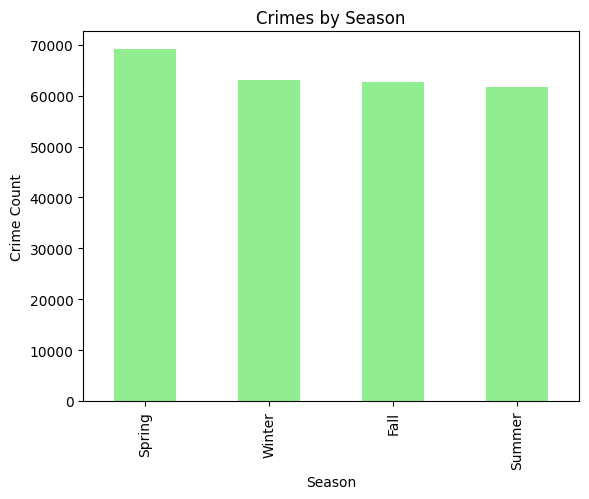

In [154]:
seasonal_counts.sort_values(ascending=False).plot(kind='bar', color='lightgreen').ascending=('False')
plt.title('Crimes by Season')
plt.xlabel('Season')
plt.ylabel('Crime Count')
plt.show()

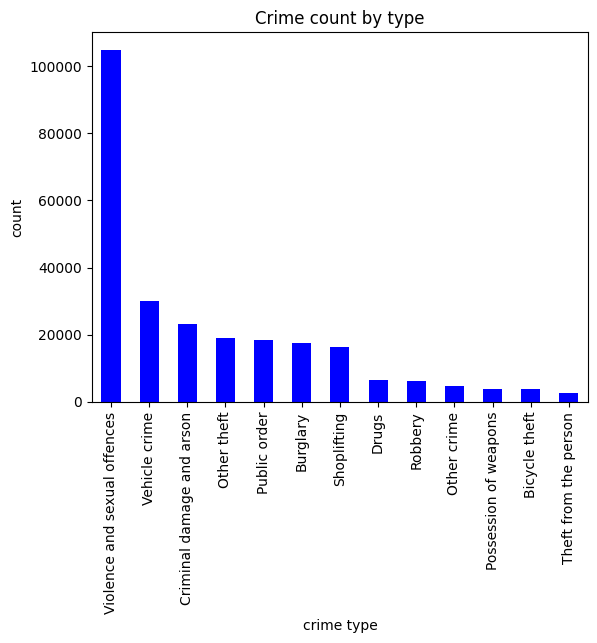

In [155]:
# Crime count by type
crime_count.plot(kind='bar', color='blue')
#visualizing the crime frequency
plt.title('Crime count by type')
plt.xlabel('crime type')
plt.ylabel('count')
plt.show()

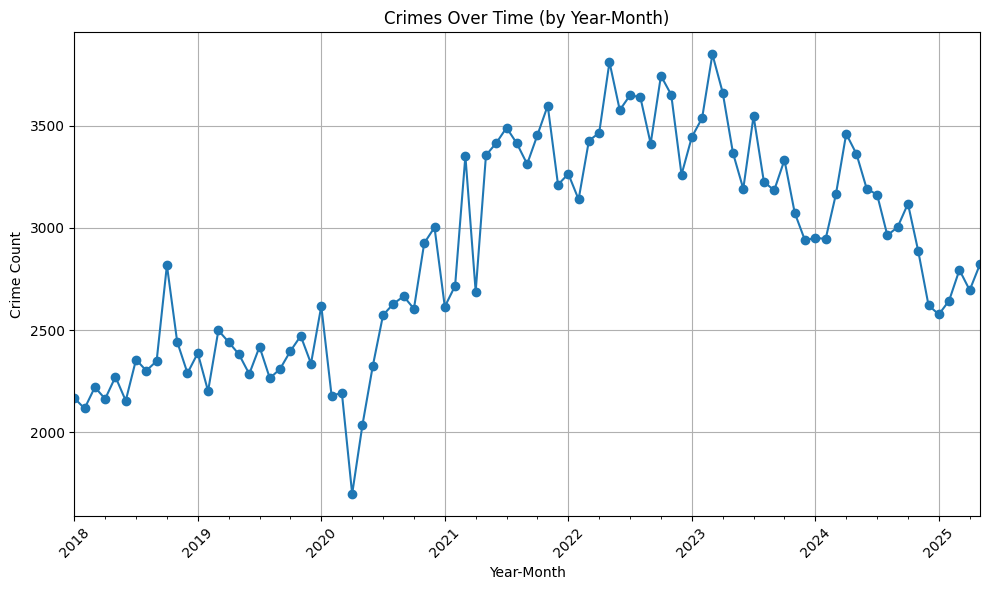

In [156]:
#Line Chart for Temporal Trends
crime_by_year_month = Analysis_data.groupby('Month').size()
# Crimes over time
crime_by_year_month.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Crimes Over Time (by Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

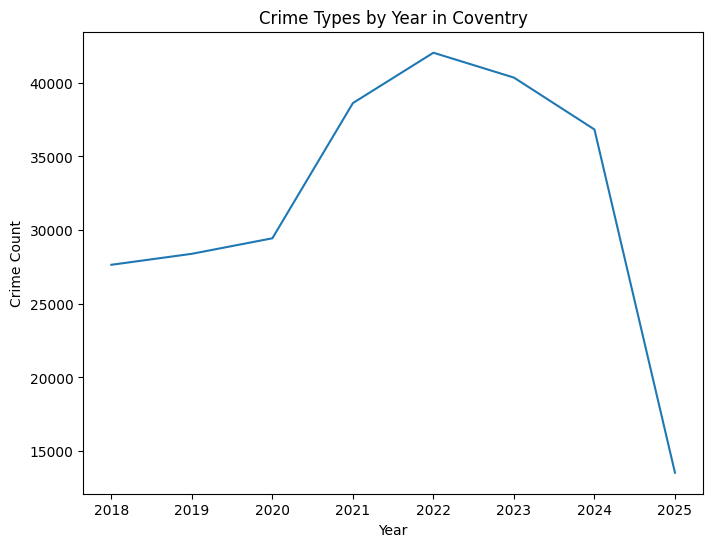

In [157]:
plt.figure(figsize=(8, 6))
yearly_counts.plot(kind='line')
plt.title('Crime Types by Year in Coventry')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

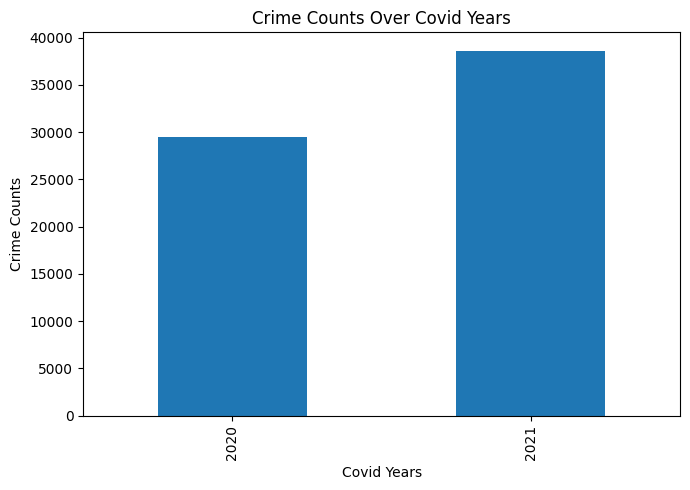

In [158]:
#Covid year by crime count
covid_years.plot(kind='bar', figsize=(7, 5))
plt.title('Crime Counts Over Covid Years')
plt.xlabel('Covid Years')
plt.ylabel('Crime Counts')
plt.tight_layout()
plt.show()

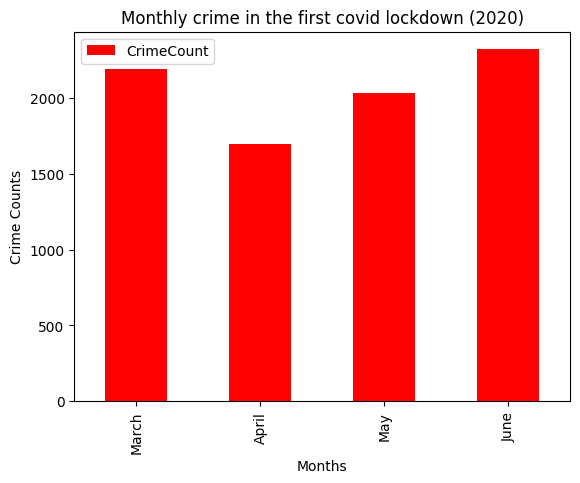

In [159]:
#first covid lockdown months
lockdown_1=covid_1.set_index('MonthName')
lockdown_1.plot(kind='bar', color='red')
plt.title('Monthly crime in the first covid lockdown (2020)' )
plt.xlabel('Months')
plt.ylabel('Crime Counts')
plt.show()

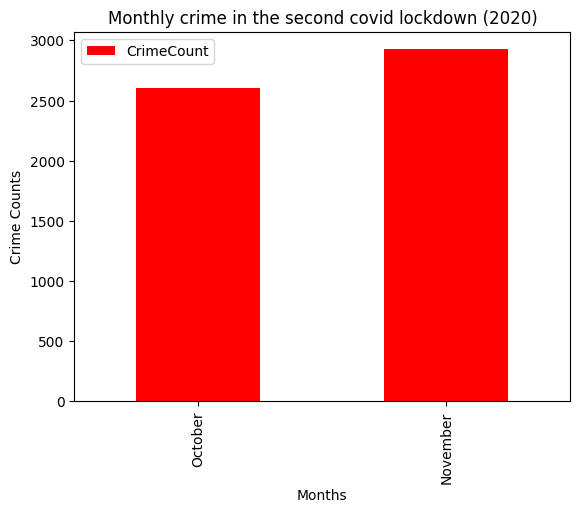

In [160]:
#second covid lockdown months
lockdown_2=covid_2.set_index('MonthName')
lockdown_2.plot(kind='bar', color='red')
plt.title('Monthly crime in the second covid lockdown (2020)' )
plt.xlabel('Months')
plt.ylabel('Crime Counts')
plt.show()

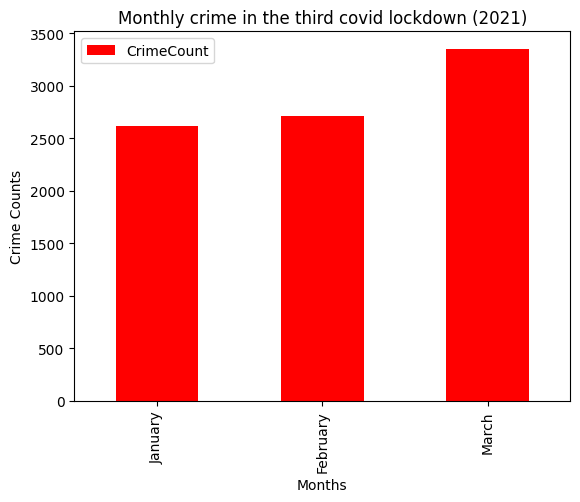

In [161]:
#second covid lockdown months
lockdown_3=covid_3.set_index('MonthName')
lockdown_3.plot(kind='bar', color='red')
plt.title('Monthly crime in the third covid lockdown (2021)' )
plt.xlabel('Months')
plt.ylabel('Crime Counts')
plt.show()

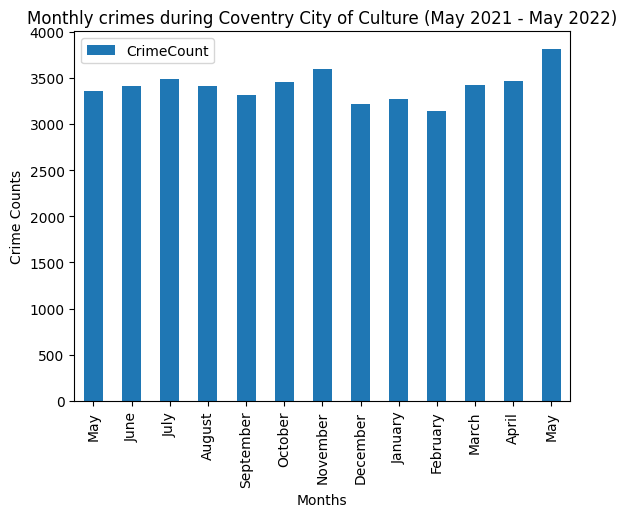

In [162]:
#monthly crimes during coventry city of culture 
coc=coventry.set_index('MonthName')
coc.plot(kind='bar')
plt.title('Monthly crimes during Coventry City of Culture (May 2021 - May 2022)')
plt.xlabel('Months')
plt.ylabel('Crime Counts')
plt.show()

